# 1. Data Cleaning

In [1184]:
import pandas as pd
import gzip
import os

# Set 
data_path = '/Users/yue/Desktop/MIMIC_IV/'

# Load 
admissions = pd.read_csv(os.path.join(data_path, 'admissions.csv.gz'))
d_icd_diagnoses = pd.read_csv(os.path.join(data_path, 'd_icd_diagnoses.csv.gz'))
diagnoses_icd = pd.read_csv(os.path.join(data_path, 'diagnoses_icd.csv.gz'))
patients = pd.read_csv(os.path.join(data_path, 'patients.csv.gz'))
transfers = pd.read_csv(os.path.join(data_path, 'transfers.csv.gz'))
icustays = pd.read_csv(os.path.join(data_path, 'icustays.csv.gz'))

# Verify 
print("admissions shape:      ", admissions.shape)
print("d_icd_diagnoses shape: ", d_icd_diagnoses.shape)
print("diagnoses_icd shape:   ", diagnoses_icd.shape)
print("patients shape:        ", patients.shape)
print("transfers shape:       ", transfers.shape)
print("icustays shape:        ", icustays.shape)

admissions shape:       (546028, 16)
d_icd_diagnoses shape:  (112107, 3)
diagnoses_icd shape:    (6364488, 5)
patients shape:         (364627, 6)
transfers shape:        (2413581, 7)
icustays shape:         (94458, 8)


## 1.1 Admissions

In [1186]:
# Check the number  
print("\nMissing values in admissions:")
print(admissions.isnull().sum())
print(admissions.head())


Missing values in admissions:
subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               534238
admission_type               0
admit_provider_id            4
admission_location           1
discharge_location      149818
insurance                 9355
language                   775
marital_status           13619
race                         0
edregtime               166788
edouttime               166788
hospital_expire_flag         0
dtype: int64
   subject_id   hadm_id            admittime            dischtime deathtime  \
0    10000032  22595853  2180-05-06 22:23:00  2180-05-07 17:15:00       NaN   
1    10000032  22841357  2180-06-26 18:27:00  2180-06-27 18:49:00       NaN   
2    10000032  25742920  2180-08-05 23:44:00  2180-08-07 17:50:00       NaN   
3    10000032  29079034  2180-07-23 12:35:00  2180-07-25 17:55:00       NaN   
4    10000068  25022803  2160-03-03 23:16:00  2160-03-04 06:26:00

In [1187]:
# Handle missing value 
admissions['admission_location'] = admissions['admission_location'].fillna('UNKNOWN')

print("\n[Step 2] Check missing in 'admission_location':")
print(admissions['admission_location'].isnull().sum())


[Step 2] Check missing in 'admission_location':
0


In [1188]:
# Handle missing values 
# Replace NaN with MISSING  
admissions['discharge_location'] = admissions['discharge_location'].fillna('MISSING')

print("\n[Step 3] Unique values in 'discharge_location':")
print(admissions['discharge_location'].value_counts(dropna=False).head())


[Step 3] Unique values in 'discharge_location':
discharge_location
HOME                        194204
MISSING                     149818
HOME HEALTH CARE             99305
SKILLED NURSING FACILITY     52657
REHAB                        13845
Name: count, dtype: int64


In [1189]:
# Keep missing values in deathtime
print("\n[Step 4] Check proportion of patients who died in hospital:")
# Verify consistency  
print(admissions[['deathtime', 'hospital_expire_flag']].dropna().head())


[Step 4] Check proportion of patients who died in hospital:
               deathtime  hospital_expire_flag
71   2134-12-06 12:54:00                     1
85   2131-01-20 05:15:00                     1
121  2131-03-10 21:53:00                     1
230  2137-09-02 17:05:00                     1
255  2150-05-22 16:25:00                     1


In [1190]:
# Drop unnecessary columns language and marital_status 
admissions.drop(['language', 'marital_status'], axis=1, inplace=True)

print("\n[Step 5] Check if columns dropped:")
print([col for col in ['language', 'marital_status'] if col in admissions.columns])


[Step 5] Check if columns dropped:
[]


In [1191]:
# Keep missing values in insurance
print("\n[Step 6] Missing count in 'insurance':")
print(admissions['insurance'].isnull().sum())


[Step 6] Missing count in 'insurance':
9355


In [1192]:
# Keep edregtime and edouttime
print("\n[Step 7] Sample rows with edregtime not null:")
print(admissions[admissions['edregtime'].notnull()][['subject_id', 'admission_type', 'edregtime', 'edouttime']].head())


[Step 7] Sample rows with edregtime not null:
   subject_id  admission_type            edregtime            edouttime
0    10000032          URGENT  2180-05-06 19:17:00  2180-05-06 23:30:00
1    10000032        EW EMER.  2180-06-26 15:54:00  2180-06-26 21:31:00
2    10000032        EW EMER.  2180-08-05 20:58:00  2180-08-06 01:44:00
3    10000032        EW EMER.  2180-07-23 05:54:00  2180-07-23 14:00:00
4    10000068  EU OBSERVATION  2160-03-03 21:55:00  2160-03-04 06:26:00


In [1193]:
# Final check
print("\n[Step 8] Final missing values check:")
print(admissions.isnull().sum())


[Step 8] Final missing values check:
subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
deathtime               534238
admission_type               0
admit_provider_id            4
admission_location           0
discharge_location           0
insurance                 9355
race                         0
edregtime               166788
edouttime               166788
hospital_expire_flag         0
dtype: int64


In [1194]:
# Save
admissions.to_csv('/Users/yue/Desktop/MIMIC_IV/admissions_cleaned.csv.gz', index=False, compression='gzip')
print("Save completed.")

Save completed.


### 1.1.1 Admission Types

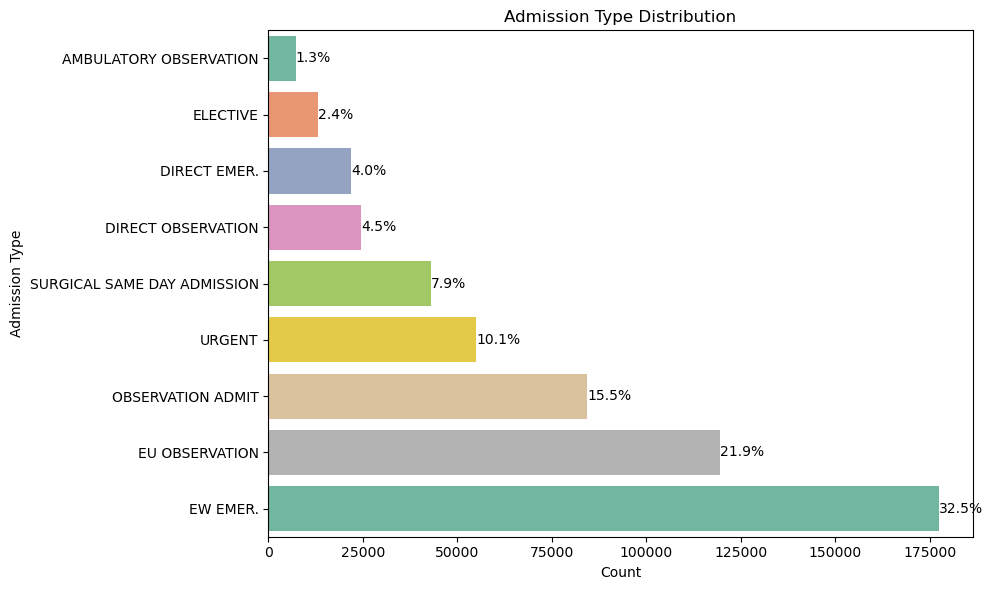

In [1196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load 
admissions = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/admissions_cleaned.csv.gz')

# Count admission types
admission_counts = admissions['admission_type'].value_counts().reset_index()
admission_counts.columns = ['admission_type', 'count']
admission_counts['percent'] = (admission_counts['count'] / admission_counts['count'].sum() * 100).round(1)

# Sort the results 
admission_counts = admission_counts.sort_values('count', ascending=True)

# Plot 
plt.figure(figsize=(10, 6))
sns.barplot(data=admission_counts,
            x='count', y='admission_type',
            hue='admission_type',
            palette='Set2', legend=False) 

# Plot 
for i, (count, pct) in enumerate(zip(admission_counts['count'], admission_counts['percent'])):
    plt.text(count + 50, i, f'{pct}%', va='center')

plt.title('Admission Type Distribution')
plt.xlabel('Count')
plt.ylabel('Admission Type')
plt.tight_layout()
plt.show()

##  1.2 d_icd_diagnoses

In [1198]:
# Check missing values 
print("\nMissing values in d_icd_diagnoses before cleaning:")
print(d_icd_diagnoses.isnull().sum())

print(d_icd_diagnoses.head())


Missing values in d_icd_diagnoses before cleaning:
icd_code       0
icd_version    0
long_title     0
dtype: int64
  icd_code  icd_version                             long_title
0     0010            9         Cholera due to vibrio cholerae
1     0011            9  Cholera due to vibrio cholerae el tor
2     0019            9                   Cholera, unspecified
3     0020            9                          Typhoid fever
4     0021            9                    Paratyphoid fever A


In [1199]:
# Filter records with icd_version equal to 10  
icd10_codes_df = d_icd_diagnoses[d_icd_diagnoses['icd_version'] == 10]

# Select icd_code column and drop duplicates  
icd10_code_list = icd10_codes_df['icd_code'].drop_duplicates().tolist()

# Head  
print("Total unique ICD-10 codes extracted:", len(icd10_code_list))
print("Sample ICD-10 codes:", icd10_code_list[:10])

Total unique ICD-10 codes extracted: 97441
Sample ICD-10 codes: ['A00', 'A000', 'A001', 'A009', 'A01', 'A010', 'A0100', 'A0101', 'A0102', 'A0103']


In [1200]:
# Save
icd10_codes_df[['icd_code']].drop_duplicates().to_csv(
    '/Users/yue/Desktop/MIMIC_IV/icd10_codes_only.csv',
    index=False
)
print("Save completed.")

Save completed.


## 1.3 Diagnoses_icd

In [1202]:
# Check missing values 
print("\nMissing values in diagnoses_icd before cleaning:")
print(diagnoses_icd.isnull().sum())
print(diagnoses_icd.head())


Missing values in diagnoses_icd before cleaning:
subject_id     0
hadm_id        0
seq_num        0
icd_code       0
icd_version    0
dtype: int64
   subject_id   hadm_id  seq_num icd_code  icd_version
0    10000032  22595853        1     5723            9
1    10000032  22595853        2    78959            9
2    10000032  22595853        3     5715            9
3    10000032  22595853        4    07070            9
4    10000032  22595853        5      496            9


### 1.3.1 ICD-10 retains three digits

In [1204]:
# Check ICD-10
print(diagnoses_icd['icd_version'].value_counts(normalize=True))

icd_version
10    0.542973
9     0.457027
Name: proportion, dtype: float64


In [1205]:
# Load the original table
diagnoses_icd = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/diagnoses_icd.csv.gz')

# Keep only ICD-10 codes
diagnoses_icd = diagnoses_icd[diagnoses_icd['icd_version'] == 10].copy()

# Convert to string and extract 3-character ICD code
diagnoses_icd['icd_code'] = diagnoses_icd['icd_code'].astype(str)
diagnoses_icd['icd_code_3char'] = diagnoses_icd['icd_code'].str.extract(r'^([A-Z]\d{2})')

# Check 
print("Remaining ICD-10 rows:", len(diagnoses_icd))
print(diagnoses_icd[['icd_code', 'icd_code_3char']].head(10))

Remaining ICD-10 rows: 3455747
   icd_code icd_code_3char
40    G3183            G31
41    F0280            F02
42     R441            R44
43     R296            R29
44     E785            E78
45    Z8546            Z85
46    R4182            R41
47      G20            G20
48    F0280            F02
49     R609            R60


In [1206]:
# Save
diagnoses_icd.to_csv('/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_3char.csv.gz', index=False, compression='gzip')
print("Save completed.")

Save completed.


### 1.3.2 With name

In [1208]:
# Load  
diagnoses_icd = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_3char.csv.gz')
d_icd = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/d_icd_diagnoses.csv.gz')

# Extract ICD-10 code   
d_icd_10 = d_icd[d_icd['icd_version'] == 10].copy()
icd10_dict = d_icd_10[['icd_code', 'long_title']].copy()
icd10_dict['icd_code_3char'] = icd10_dict['icd_code'].astype(str).str.extract(r'^([A-Z]\d{2})')
icd10_dict = icd10_dict.drop_duplicates(subset='icd_code_3char')

# add code descriptions 
diagnoses_named = diagnoses_icd.merge(icd10_dict[['icd_code_3char', 'long_title']], on='icd_code_3char', how='left')

# Head
print(diagnoses_named[['icd_code', 'icd_code_3char', 'long_title']].drop_duplicates().head(10))

   icd_code icd_code_3char                                         long_title
0     G3183            G31  Other degenerative diseases of nervous system,...
1     F0280            F02    Dementia in other diseases classified elsewhere
2      R441            R44  Other symptoms and signs involving general sen...
3      R296            R29  Other symptoms and signs involving the nervous...
4      E785            E78  Disorders of lipoprotein metabolism and other ...
5     Z8546            Z85             Personal history of malignant neoplasm
6     R4182            R41  Other symptoms and signs involving cognitive f...
7       G20            G20                                Parkinson's disease
9      R609            R60                    Edema, not elsewhere classified
12    R1310            R13                              Aphagia and dysphagia


In [1209]:
# Save
diagnoses_named.to_csv('/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz', index=False)
print("Save completed.")

Save completed.


## 1.4 Patients

In [1211]:
# Check missing values
print("\nMissing values in patients before cleaning:")
print(patients.isnull().sum())
print(patients.head())


Missing values in patients before cleaning:
subject_id                0
gender                    0
anchor_age                0
anchor_year               0
anchor_year_group         0
dod                  326326
dtype: int64
   subject_id gender  anchor_age  anchor_year anchor_year_group         dod
0    10000032      F          52         2180       2014 - 2016  2180-09-09
1    10000048      F          23         2126       2008 - 2010         NaN
2    10000058      F          33         2168       2020 - 2022         NaN
3    10000068      F          19         2160       2008 - 2010         NaN
4    10000084      M          72         2160       2017 - 2019  2161-02-13


### 1.4.1 Gender Distribution

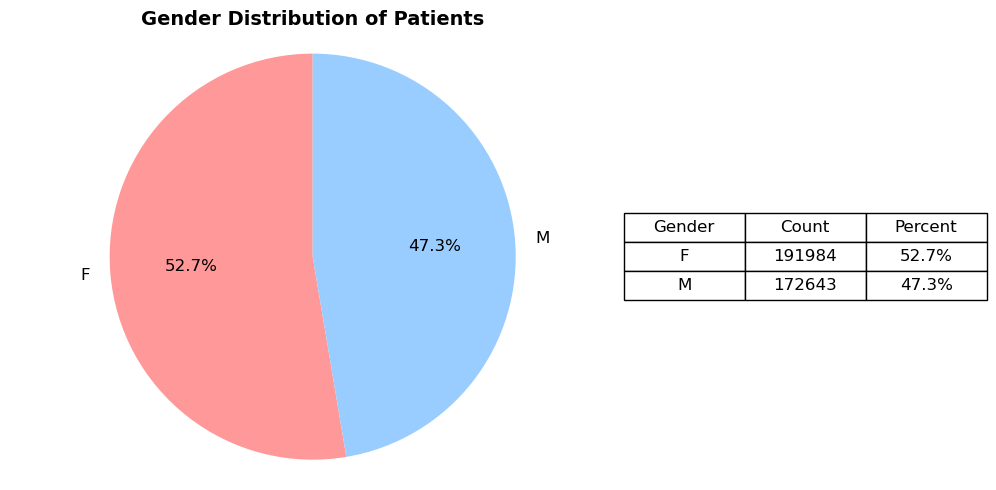

In [1213]:
import pandas as pd
import matplotlib.pyplot as plt

# Load 
patients = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/patients.csv.gz')

# Load 
gender_counts = patients['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
gender_counts['Percent'] = (gender_counts['Count'] / gender_counts['Count'].sum() * 100).round(1).astype(str) + '%'

# colors 
colors = ['#FF9999', '#99CCFF']
labels = gender_counts['Gender']
sizes = gender_counts['Count']
table_data = gender_counts[['Gender', 'Count', 'Percent']].values.tolist()
table_colnames = ['Gender', 'Count', 'Percent']

# Create the layout  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [2, 1]})

# Plot pie chart 
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, textprops={'fontsize': 12})
ax1.axis('equal')
ax1.set_title('Gender Distribution of Patients', fontsize=14, fontweight='bold')

# Display table  
ax2.axis('off')  
table = ax2.table(cellText=table_data, colLabels=table_colnames,
                  cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)   

plt.tight_layout()
plt.show()

## 1.5 Transfers

### 1.5.1 Missing value filling

In [1216]:
# Check missing values
print("\nMissing values in transfers before cleaning:")
print(transfers.isnull().sum())
print(transfers.head())


Missing values in transfers before cleaning:
subject_id          0
hadm_id        408977
transfer_id         0
eventtype           0
careunit            0
intime              0
outtime        546123
dtype: int64
   subject_id     hadm_id  transfer_id  eventtype              careunit  \
0    10000032  22595853.0     33258284         ED  Emergency Department   
1    10000032  22595853.0     35223874      admit            Transplant   
2    10000032  22595853.0     36904543  discharge               UNKNOWN   
3    10000032  22841357.0     34100253  discharge               UNKNOWN   
4    10000032  22841357.0     34703856      admit            Transplant   

                intime              outtime  
0  2180-05-06 19:17:00  2180-05-06 23:30:00  
1  2180-05-06 23:30:00  2180-05-07 17:21:27  
2  2180-05-07 17:21:27                  NaN  
3  2180-06-27 18:49:12                  NaN  
4  2180-06-26 21:31:00  2180-06-27 18:49:12  


In [1217]:
# Sort by subject_id and intime to ensure the trajectories follow chronological order
transfers = transfers.sort_values(by=['subject_id', 'intime']).reset_index(drop=True)

# Head five
print("\n[Step 1] First 5 rows after sorting by subject_id and intime:")
print(transfers[['subject_id', 'intime', 'outtime']].head())


[Step 1] First 5 rows after sorting by subject_id and intime:
   subject_id               intime              outtime
0    10000032  2180-05-06 19:17:00  2180-05-06 23:30:00
1    10000032  2180-05-06 23:30:00  2180-05-07 17:21:27
2    10000032  2180-05-07 17:21:27                  NaN
3    10000032  2180-06-26 15:54:00  2180-06-26 21:31:00
4    10000032  2180-06-26 21:31:00  2180-06-27 18:49:12


In [1218]:
# Generate next_intime for each patient
transfers['next_intime'] = transfers.groupby('subject_id')['intime'].shift(-1)
print("\n [Step 2] Example of next_intime added:")
print(transfers[['subject_id', 'intime', 'next_intime']].head(10))


 [Step 2] Example of next_intime added:
   subject_id               intime          next_intime
0    10000032  2180-05-06 19:17:00  2180-05-06 23:30:00
1    10000032  2180-05-06 23:30:00  2180-05-07 17:21:27
2    10000032  2180-05-07 17:21:27  2180-06-26 15:54:00
3    10000032  2180-06-26 15:54:00  2180-06-26 21:31:00
4    10000032  2180-06-26 21:31:00  2180-06-27 18:49:12
5    10000032  2180-06-27 18:49:12  2180-07-22 16:24:00
6    10000032  2180-07-22 16:24:00  2180-07-23 05:54:00
7    10000032  2180-07-23 05:54:00  2180-07-23 14:00:00
8    10000032  2180-07-23 14:00:00  2180-07-23 23:50:47
9    10000032  2180-07-23 23:50:47  2180-07-24 19:52:58


In [1219]:
# Merge dischtime from admissions table
admissions = admissions[['hadm_id', 'dischtime']]
transfers = transfers.merge(admissions, on='hadm_id', how='left')
print("\n[Step 3] Sample rows with dischtime after merge:")
print(transfers[['hadm_id', 'dischtime']].dropna().head())


[Step 3] Sample rows with dischtime after merge:
      hadm_id            dischtime
0  22595853.0  2180-05-07 17:15:00
1  22595853.0  2180-05-07 17:15:00
2  22595853.0  2180-05-07 17:15:00
3  22841357.0  2180-06-27 18:49:00
4  22841357.0  2180-06-27 18:49:00


In [1220]:
# Initialize output columns
transfers['outtime_filled'] = transfers['outtime']
transfers['outtime_source'] = 'original'
print("\n [Step 4] Initial fill source count:")
print(transfers['outtime_source'].value_counts())


 [Step 4] Initial fill source count:
outtime_source
original    2413581
Name: count, dtype: int64


In [1221]:
# Fill missing outtime using next_intime
mask1 = transfers['outtime'].isnull() & transfers['next_intime'].notnull()
transfers.loc[mask1, 'outtime_filled'] = transfers.loc[mask1, 'next_intime']
transfers.loc[mask1, 'outtime_source'] = 'next_intime'
print(f"\n [Step 5] Filled outtime using next_intime: {mask1.sum()} rows")
print(transfers['outtime_source'].value_counts())


 [Step 5] Filled outtime using next_intime: 358107 rows
outtime_source
original       2055474
next_intime     358107
Name: count, dtype: int64


In [1222]:
# Fill remaining missing values using dischtime
mask2 = transfers['outtime_filled'].isnull() & transfers['dischtime'].notnull()
transfers.loc[mask2, 'outtime_filled'] = transfers.loc[mask2, 'dischtime']
transfers.loc[mask2, 'outtime_source'] = 'dischtime'
print(f"\n [Step 6] Filled outtime using dischtime: {mask2.sum()} rows")
print(transfers['outtime_source'].value_counts())


 [Step 6] Filled outtime using dischtime: 188016 rows
outtime_source
original       1867458
next_intime     358107
dischtime       188016
Name: count, dtype: int64


In [1223]:
# Mark still missing outtime as missing
mask3 = transfers['outtime_filled'].isnull()
transfers.loc[mask3, 'outtime_source'] = 'missing'
print(f"\n [Step 7] Still missing after all fills: {mask3.sum()} rows")
print(transfers['outtime_source'].value_counts())


 [Step 7] Still missing after all fills: 0 rows
outtime_source
original       1867458
next_intime     358107
dischtime       188016
Name: count, dtype: int64


In [1224]:
# Define output path
data_path = '/Users/yue/Desktop/MIMIC_IV/'
output_file = data_path + 'transfers_outtime_filled.csv.gz'

# Save 
transfers.to_csv(output_file, index=False, compression='gzip')

print("Save completed.")

Save completed.


### 1.5.2 Transfer Unit Frequencies

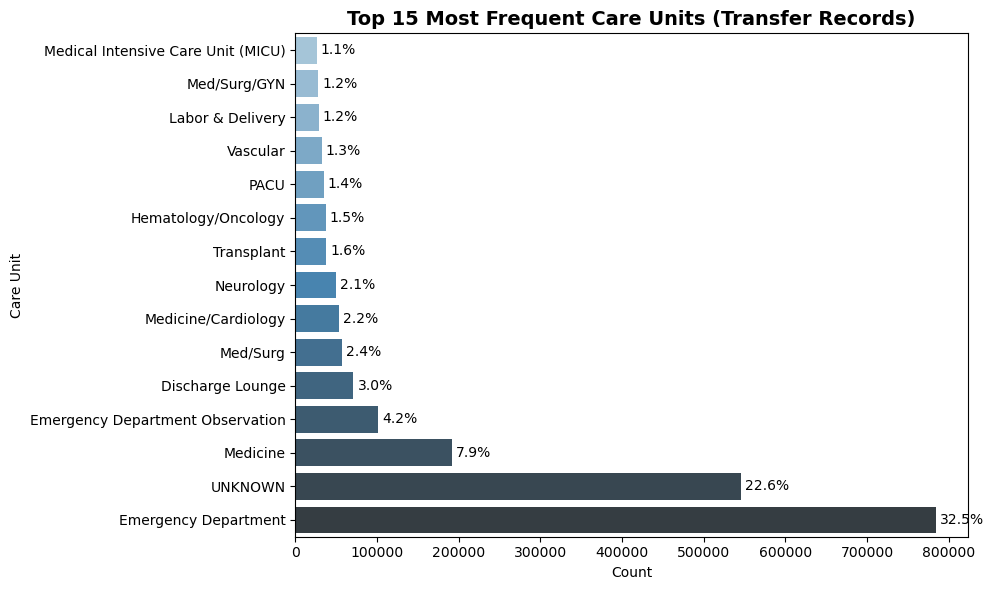

In [1226]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data  
transfers = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/transfers_outtime_filled.csv.gz')

# Count careunit occurrences 
careunit_counts = transfers['careunit'].value_counts().reset_index()
careunit_counts.columns = ['careunit', 'count']
careunit_counts['percent'] = (careunit_counts['count'] / careunit_counts['count'].sum() * 100).round(1)

# Select top 15  
top15 = careunit_counts.head(15).sort_values('count', ascending=True)

# Plot with hue 
plt.figure(figsize=(10, 6))
sns.barplot(data=top15,
            x='count', y='careunit',
            hue='careunit',
            # Prevent duplicate legends  
            palette=sns.color_palette("Blues_d", n_colors=15),
            legend=False)  

# Add percentage labels 
for i, (count, pct) in enumerate(zip(top15['count'], top15['percent'])):
    plt.text(count + 5000, i, f'{pct}%', va='center', fontsize=10)

# Add title and format plot
plt.title('Top 15 Most Frequent Care Units (Transfer Records)', fontsize=14, fontweight='bold')
plt.xlabel('Count')
plt.ylabel('Care Unit')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## 1.6 Icustays

### 1.6.1 Missing value filling

In [1229]:
# Check missing values
print("\nMissing values in icustays before cleaning:")
print(icustays.isnull().sum())

print(icustays.head())


Missing values in icustays before cleaning:
subject_id         0
hadm_id            0
stay_id            0
first_careunit     0
last_careunit      0
intime             0
outtime           14
los               14
dtype: int64
   subject_id   hadm_id   stay_id                       first_careunit  \
0    10000032  29079034  39553978   Medical Intensive Care Unit (MICU)   
1    10000690  25860671  37081114   Medical Intensive Care Unit (MICU)   
2    10000980  26913865  39765666   Medical Intensive Care Unit (MICU)   
3    10001217  24597018  37067082  Surgical Intensive Care Unit (SICU)   
4    10001217  27703517  34592300  Surgical Intensive Care Unit (SICU)   

                         last_careunit               intime  \
0   Medical Intensive Care Unit (MICU)  2180-07-23 14:00:00   
1   Medical Intensive Care Unit (MICU)  2150-11-02 19:37:00   
2   Medical Intensive Care Unit (MICU)  2189-06-27 08:42:00   
3  Surgical Intensive Care Unit (SICU)  2157-11-20 19:18:02   
4  Surgical In

In [1230]:
# Show rows with missing outtime
missing_outtime_df = icustays[icustays['outtime'].isnull()]
print(missing_outtime_df)

       subject_id   hadm_id   stay_id  \
4486     10492274  29238609  38475410   
8155     10882284  28910170  30924165   
15758    11661851  24632782  37339160   
16892    11783844  26555335  38888759   
24344    12590282  27383443  38914513   
40939    14330929  27393728  31619283   
54594    15777534  23340499  37403535   
55595    15882332  24693580  36353950   
57792    16117624  26745154  33009457   
59939    16348177  22166548  34986686   
64156    16799689  26464023  33734563   
70096    17434223  29899968  37666268   
82482    18717462  26658752  34314756   
89915    19526758  27199762  34971926   

                                         first_careunit  \
4486   Medical/Surgical Intensive Care Unit (MICU/SICU)   
8155                 Medical Intensive Care Unit (MICU)   
15758                          Coronary Care Unit (CCU)   
16892                          Coronary Care Unit (CCU)   
24344   Neuro Surgical Intensive Care Unit (Neuro SICU)   
40939  Medical/Surgical Intens

In [1231]:
# List of index values to delete
missing_indices = [4486, 8155, 15758, 16892, 24344, 40939, 54594, 55595, 
                   57792, 59939, 64156, 70096, 82482, 89915]

# Drop them
icustays_cleaned = icustays.drop(index=missing_indices)

In [1232]:
# Show number of removed rows 
print("Removed rows:", len(icustays) - len(icustays_cleaned))

# Check missing values remain
print(icustays_cleaned.isnull().sum())

Removed rows: 14
subject_id        0
hadm_id           0
stay_id           0
first_careunit    0
last_careunit     0
intime            0
outtime           0
los               0
dtype: int64


In [1233]:
#Save 
icustays_cleaned.to_csv('/Users/yue/Desktop/MIMIC_IV/icustays_cleaned.csv.gz', index=False)
print("Save completed.")

Save completed.


### 1.6.2 Yearly Trend of ICU Admissions

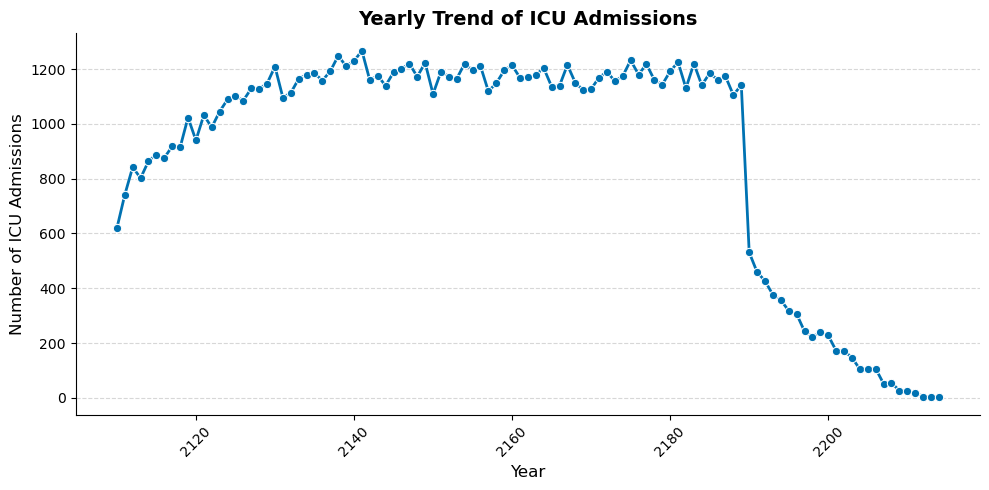

In [1235]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load
icustays = pd.read_csv('/Users/yue/Desktop/MIMIC_IV/icustays_cleaned.csv.gz')
icustays['intime'] = pd.to_datetime(icustays['intime'], errors='coerce')
icustays['icu_year'] = icustays['intime'].dt.year

# Aggregate yearly ICU admissions 
icu_by_year = icustays['icu_year'].value_counts().sort_index().reset_index()
icu_by_year.columns = ['Year', 'Count']

# Plot 
plt.figure(figsize=(10, 5))
sns.lineplot(data=icu_by_year, x='Year', y='Count', marker='o', linewidth=2, color='#0072B2')

# Format the plot 
plt.title('Yearly Trend of ICU Admissions', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of ICU Admissions', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

## 1.7 Data Overview

In [6]:
# Load 
import pandas as pd
import os

data_path = '/Users/yue/Desktop/MIMIC_IV/'
admissions = pd.read_csv(os.path.join(data_path, 'admissions.csv.gz'))
patients = pd.read_csv(os.path.join(data_path, 'patients.csv.gz'))
diagnoses_icd = pd.read_csv(os.path.join(data_path, 'diagnoses_icd.csv.gz'))
icustays = pd.read_csv(os.path.join(data_path, 'icustays.csv.gz'))
transfers = pd.read_csv(os.path.join(data_path, 'transfers.csv.gz'))

# Calculate key counts
death_count = admissions['hospital_expire_flag'].sum()
total_patients = patients.shape[0]
male_count = patients[patients['gender'] == 'M'].shape[0]
female_count = patients[patients['gender'] == 'F'].shape[0]
total_admissions = admissions.shape[0]
total_icustays = icustays.shape[0]
total_transfers = transfers.shape[0]
total_diagnoses = diagnoses_icd.shape[0]

# Calculate time range and age distribution
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
start_year = admissions['admittime'].min().year
end_year = admissions['admittime'].max().year

mean_age = patients['anchor_age'].mean()
median_age = patients['anchor_age'].median()
min_age = patients['anchor_age'].min()
max_age = patients['anchor_age'].max()

# Print summary
print(f"Total patients {total_patients}  Male {male_count}  Female {female_count}")
print(f"Total deaths {death_count}")
print(f"Total admissions {total_admissions}")
print(f"Total ICU stays {total_icustays}")
print(f"Total transfers {total_transfers}")
print(f"Total ICD-10 diagnosis records {total_diagnoses}")
print(f"Data covers {start_year} to {end_year}")
print(f"Age Mean {mean_age:.1f}  Median {median_age:.1f}  Range {min_age} - {max_age}")
print("Diagnosis coding system ICD-10")

Total patients 364627  Male 172643  Female 191984
Total deaths 11801
Total admissions 546028
Total ICU stays 94458
Total transfers 2413581
Total ICD-10 diagnosis records 6364488
Data covers 2105 to 2214
Age Mean 48.9  Median 48.0  Range 18 - 91
Diagnosis coding system ICD-10


# 2. Top 50 ICD Code

In [1237]:
!pip install wordcloud

## 2.1 Top 5 table with xyz

In [1238]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [1239]:
# Load 
file_path = '/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz'
df = pd.read_csv(file_path)

# Count frequency of ICD 3 character codes 
top_codes = df['icd_code_3char'].value_counts().head(50).reset_index()
top_codes.columns = ['icd_code_3char', 'count']

# Merge with disease names 
# Ensure each 3 character ICD code has only one name 
name_map = df[['icd_code_3char', 'long_title']].drop_duplicates('icd_code_3char')
top_codes = pd.merge(top_codes, name_map, on='icd_code_3char', how='left')

# Head
top_codes.head()

,icd_code_3char,count,long_title
0,E78,97066,Disorders of lipoprotein metabolism and other ...
1,Z79,90235,Long term (current) drug therapy
2,E11,89083,Type 2 diabetes mellitus
3,I10,83775,Essential (primary) hypertension
4,Z87,72866,Personal history of other diseases and conditions


In [1240]:
# Save
top_codes.to_csv('/Users/yue/Desktop/MIMIC_IV/top50_icd10_3char.csv', index=False)
print("Save completed.")

Save completed.


## 2.2 New table without xyz

In [158]:
# Load 
import pandas as pd
import os

DATA_PATH = '/Users/yue/Desktop/MIMIC_IV/'
TOP_N = 15                           
EXCLUDE_XYZ = True   

# Load diagnoses data
df = pd.read_csv(os.path.join(DATA_PATH, 'diagnoses_icd_named.csv.gz'))

# Optional: fallback for subject_id if not present
if 'subject_id' not in df.columns and 'hadm_id' in df.columns:
    admissions = pd.read_csv(os.path.join(DATA_PATH, 'admissions.csv.gz'))[['hadm_id', 'subject_id']]
    df = df.merge(admissions, on='hadm_id', how='left')

# Clean and filter codes
df['icd_code_3char'] = df['icd_code_3char'].str.upper().str.strip()
df = df[~df['icd_code_3char'].fillna('').str.startswith(('X', 'Y', 'Z'))]  

# Aggregate counts
# Count total occurrences
total_count = df.groupby('icd_code_3char').size().rename('count').reset_index()

# Count unique patients with this code
patient_count = (
    df.groupby('icd_code_3char')['subject_id']
      .nunique()
      .rename('patients_with_code')
      .reset_index()
)

# Map code to long title
name_map = df[['icd_code_3char', 'long_title']].drop_duplicates('icd_code_3char')

# Merge all info
table = (
    total_count
    .merge(patient_count, on='icd_code_3char', how='left')
    .merge(name_map, on='icd_code_3char', how='left')
    .sort_values('count', ascending=False)
    .head(TOP_N)
    .reset_index(drop=True)
)

# Save 
out_name = f"top{TOP_N}_icd10_3char_with_patients_noXYZ.csv"
out_path = os.path.join(DATA_PATH, out_name)
table.to_csv(out_path, index=False)

print(table.head(15))
print(f"Saved to {out_path}")

   icd_code_3char  count  patients_with_code  \
0             E78  97066               49424   
1             E11  89083               26344   
2             I10  83775               48611   
3             I25  70669               24342   
4             E87  67058               31316   
5             K21  56792               30323   
6             F32  47029               25505   
7             I48  46398               20952   
8             I50  43913               18890   
9             F41  43859               25108   
10            N18  43672               18107   
11            N17  40981               25437   
12            G47  38711               20434   
13            E66  31135               18426   
14            F17  28721               16553   

                                           long_title  
0   Disorders of lipoprotein metabolism and other ...  
1                            Type 2 diabetes mellitus  
2                    Essential (primary) hypertension  
3      

# 3. Construct the disease trajectory (A to B)

## 3.1 Path

In [55]:
from itertools import pairwise

In [1243]:
import pandas as pd
import itertools                      
from itertools import pairwise      

In [49]:
# Load 
diag_path = '/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_3char.csv.gz'
df = pd.read_csv(diag_path)

# Merge with admission time 
adm_path = '/Users/yue/Desktop/MIMIC_IV/admissions_cleaned.csv.gz'
adm = pd.read_csv(adm_path)[['subject_id', 'hadm_id', 'admittime']]
df = df.merge(adm, on=['subject_id','hadm_id'], how='left')

# Sort by patient and admission time 
df = df.sort_values(['subject_id', 'admittime'])
print("\n Step 3 — Sorted diagnoses (head):")
print(df.head())


 Step 3 — Sorted diagnoses (head):
   subject_id   hadm_id  seq_num icd_code  icd_version icd_code_3char  \
0    10000084  23052089        1    G3183           10            G31   
1    10000084  23052089        2    F0280           10            F02   
2    10000084  23052089        3     R441           10            R44   
3    10000084  23052089        4     R296           10            R29   
4    10000084  23052089        5     E785           10            E78   

             admittime  
0  2160-11-21 01:56:00  
1  2160-11-21 01:56:00  
2  2160-11-21 01:56:00  
3  2160-11-21 01:56:00  
4  2160-11-21 01:56:00  


In [59]:
# Generate adjacent diagnosis pairs (A to B) per patient 
def get_pairs(code_list):
    
    return [(a, b) for a, b in pairwise(code_list) if a != b]

trajectory_pairs = (
    df.groupby('subject_id')['icd_code_3char']  
    .apply(list)  
    .apply(get_pairs)  
)

# Flatten into a transition table 
flat_rows = []
for sid, codes in df.groupby('subject_id')['icd_code_3char']:  
    seq = list(codes)
    for a, b in pairwise(seq):  
        if a != b:
            flat_rows.append((sid, a, b))  

trajectory_df = pd.DataFrame(flat_rows, columns=['subject_id', 'source', 'target'])

print("\nStep 5 — Raw transition pairs with subject_id (head):")
print(trajectory_df.head())  


Step 5 — Raw transition pairs with subject_id (head):
   subject_id source target
0    10000084    G31    F02
1    10000084    F02    R44
2    10000084    R44    R29
3    10000084    R29    E78
4    10000084    E78    Z85


In [1246]:
# Count frequency of each path 
path_counts = (
    trajectory_df
    .value_counts()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)
print("\n Step 6 — Top transitions (head):")
print(path_counts.head())


 Step 6 — Top transitions (head):
  source target  count
0    I10    E78  21090
1    Y83    Y92  13142
2    I25    Z95  12508
3    E66    Z68  12349
4    I12    N18  10878


In [63]:
# Count frequency of each path
path_counts = (
    trajectory_df
    .groupby(['source', 'target'])  
    .agg(count=('source', 'size'), patient_count=('subject_id', 'nunique'))  
    .reset_index()
    .sort_values('count', ascending=False)
)

print("\nStep 7 — Top transitions (head):")
print(path_counts.head())


Step 7 — Top transitions (head):
       source target  count  patient_count
84660     I10    E78  21090          15738
232457    Y83    Y92  13142          10435
89313     I25    Z95  12508           7221
43604     E66    Z68  12349           9479
86446     I12    N18  10878           7379


In [65]:
# Save 
out_path = '/Users/yue/Desktop/MIMIC_IV/icd10_3char_transitions.csv'
path_counts.to_csv(out_path, index=False)
print("Save completed")

out_path = '/Users/yue/Desktop/MIMIC_IV/icd10_3char_transitions_updated.csv'
path_counts.to_csv(out_path, index=False)
print("Save completed.")

Save completed
Save completed.


## 3.2 Directed Graph of Top 10 Disease Transition Paths

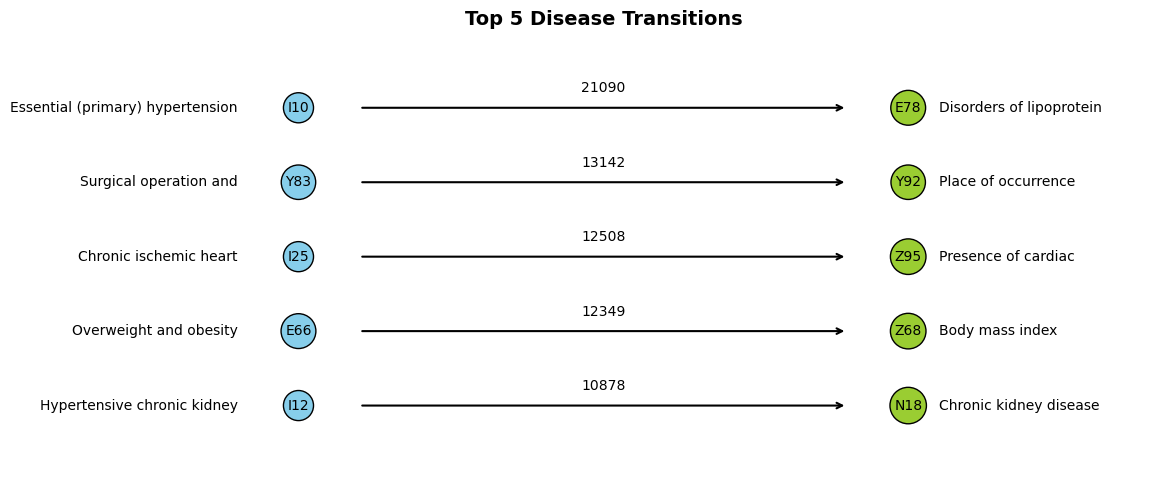

In [1249]:
import matplotlib.pyplot as plt
import pandas as pd

# Input 
data = [
    {'source': 'I10', 'target': 'E78', 'count': 21090},
    {'source': 'Y83', 'target': 'Y92', 'count': 13142},
    {'source': 'I25', 'target': 'Z95', 'count': 12508},
    {'source': 'E66', 'target': 'Z68', 'count': 12349},
    {'source': 'I12', 'target': 'N18', 'count': 10878}
]
df = pd.DataFrame(data)

# Create the figure 
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')

# Draw each path per row 
for i, row in df.iterrows():
    y = -i * 1.5  
    

    # Left side disease name 
    ax.text(-0.1, y, icd_name_map[row['source']], ha='right', va='center', fontsize=10)

    # Left side ICD circle
    ax.text(0.0, y, row['source'], ha='center', va='center',
            bbox=dict(boxstyle='circle', facecolor='skyblue'), fontsize=10)

    # Right side ICD circle
    ax.text(1.0, y, row['target'], ha='center', va='center',
            bbox=dict(boxstyle='circle', facecolor='yellowgreen'), fontsize=10)

    # Right side disease name
    ax.text(1.05, y, icd_name_map[row['target']], ha='left', va='center', fontsize=10)

    # Arrow from left ICD to right ICD
    ax.annotate('', xy=(0.9, y), xytext=(0.1, y),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # Frequency label in the middle
    ax.text(0.5, y + 0.25, str(row['count']), ha='center', va='bottom', fontsize=10)

# Add title
plt.title("Top 5 Disease Transitions", fontsize=14, weight='bold')
plt.xlim(-0.4, 1.4)
# Manually adjust y-axis limits to make all rows visible
plt.ylim(-7.5, 1.5)  
plt.tight_layout()
plt.show()

## 3.3 Without X,Y,Z path

In [67]:
import pandas as pd

# Read data
in_path = '/Users/yue/Desktop/MIMIC_IV/icd10_3char_transitions_updated.csv'
df = pd.read_csv(in_path)

# Remove rows where source or target starts with X Y or Z
df_no_xyz = df[
    ~df['source'].str.startswith(('X', 'Y', 'Z')) &
    ~df['target'].str.startswith(('X', 'Y', 'Z'))
]

# Show top 15 rows 
print(df_no_xyz.head(15))

   source target  count  patient_count
0     I10    E78  21090          15738
4     I12    N18  10878           7379
6     I13    I50   8383           4373
7     F32    F41   8177           5968
10    E78    K21   5985           4870
11    F41    F32   5928           4472
12    E11    N18   5579           3699
14    E78    I10   5414           4835
15    N17    E87   5060           4529
18    I25    E78   4677           3888
19    E78    E11   4674           3958
20    E78    I25   4642           3851
21    I11    I50   4591           3466
23    E11    E78   4463           3749
24    I10    E11   4433           3718


In [71]:
import pandas as pd


trans_path = '/Users/yue/Desktop/MIMIC_IV/icd10_3char_transitions_updated.csv'
name_path   = '/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz'

trans = pd.read_csv(trans_path)                      
names = pd.read_csv(name_path)[['icd_code_3char', 'long_title']].drop_duplicates()

# Attach names for source and target, then remove X Y Z codes
trans = trans.merge(names, left_on='source', right_on='icd_code_3char', how='left') \
             .rename(columns={'long_title': 'source_title'}).drop(columns=['icd_code_3char'])
trans = trans.merge(names, left_on='target', right_on='icd_code_3char', how='left') \
             .rename(columns={'long_title': 'target_title'}).drop(columns=['icd_code_3char'])

trans_no_xyz = trans[
    ~trans['source'].astype(str).str.startswith(('X','Y','Z')) &
    ~trans['target'].astype(str).str.startswith(('X','Y','Z'))
]

# Show head 15 with names
cols = ['source','source_title','target','target_title','count']
cols = [c for c in cols if c in trans_no_xyz.columns]   # keep only existing columns
print(trans_no_xyz[cols].head(15))

   source                                       source_title target  \
0     I10                   Essential (primary) hypertension    E78   
4     I12                Hypertensive chronic kidney disease    N18   
6     I13      Hypertensive heart and chronic kidney disease    I50   
7     F32                                 Depressive episode    F41   
10    E78  Disorders of lipoprotein metabolism and other ...    K21   
11    F41                            Other anxiety disorders    F32   
12    E11                           Type 2 diabetes mellitus    N18   
14    E78  Disorders of lipoprotein metabolism and other ...    I10   
15    N17                               Acute kidney failure    E87   
18    I25                     Chronic ischemic heart disease    E78   
19    E78  Disorders of lipoprotein metabolism and other ...    E11   
20    E78  Disorders of lipoprotein metabolism and other ...    I25   
21    I11                         Hypertensive heart disease    I50   
23    

In [73]:
# Save 
out_path = '/Users/yue/Desktop/MIMIC_IV/top15_no_xyz_with_names.csv'
trans_no_xyz[cols].head(15).to_csv(out_path, index=False)

print(f"Saved to {out_path}")

Saved to /Users/yue/Desktop/MIMIC_IV/top15_no_xyz_with_names.csv


# 4. Temporal Ordering and Significance Mining

## 4.1 Find significant edges

In [1252]:
import pandas as pd
from scipy.stats import fisher_exact
from tqdm import tqdm

In [1253]:
# Loading
TRANSITIONS_PATH = "/Users/yue/Desktop/MIMIC_IV/icd10_3char_transitions.csv"
DIAGNOSES_PATH = "/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz"
ADMISSIONS_PATH = "/Users/yue/Desktop/MIMIC_IV/admissions_cleaned.csv.gz"
OUT_PATH = "/Users/yue/Desktop/MIMIC_IV/significant_edges.csv"

In [1254]:
# Load 
print("Step 1: Reading data")
transitions_df = pd.read_csv(TRANSITIONS_PATH)
diagnoses_df = pd.read_csv(DIAGNOSES_PATH)
admissions_df = pd.read_csv(ADMISSIONS_PATH)

diagnoses_df = diagnoses_df[['subject_id', 'hadm_id', 'icd_code_3char', 'seq_num']]
admissions_df = admissions_df[['hadm_id', 'subject_id', 'admittime', 'admission_type']]

print("\n transitions_df.head():")
print(transitions_df.head())

print("\n diagnoses_df.head():")
print(diagnoses_df.head())

print("\n admissions_df.head():")
print(admissions_df.head())

Step 1: Reading data

 transitions_df.head():
  source target  count
0    I10    E78  21090
1    Y83    Y92  13142
2    I25    Z95  12508
3    E66    Z68  12349
4    I12    N18  10878

 diagnoses_df.head():
   subject_id   hadm_id icd_code_3char  seq_num
0    10000084  23052089            G31        1
1    10000084  23052089            F02        2
2    10000084  23052089            R44        3
3    10000084  23052089            R29        4
4    10000084  23052089            E78        5

 admissions_df.head():
    hadm_id  subject_id            admittime  admission_type
0  22595853    10000032  2180-05-06 22:23:00          URGENT
1  22841357    10000032  2180-06-26 18:27:00        EW EMER.
2  25742920    10000032  2180-08-05 23:44:00        EW EMER.
3  29079034    10000032  2180-07-23 12:35:00        EW EMER.
4  25022803    10000068  2160-03-03 23:16:00  EU OBSERVATION


In [1255]:
# Build diagnosis sequence for each admission 
print("\n Step 2: Building diagnosis sequence dictionary")
diagnoses_sorted = diagnoses_df.sort_values(['hadm_id', 'seq_num'])
diagnoses_sorted = diagnoses_sorted.drop_duplicates(subset=['hadm_id', 'icd_code_3char'])
hadm_diag_seq = diagnoses_sorted.groupby('hadm_id')['icd_code_3char'].apply(list).to_dict()

# Head five 
print("\nhadm_diag_seq (first 5 entries):")
for i, (k, v) in enumerate(hadm_diag_seq.items()):
    print(f"{k}: {v}")
    if i == 4: break


 Step 2: Building diagnosis sequence dictionary

hadm_diag_seq (first 5 entries):
20000024: ['D50', 'K52', 'I10', 'E53', 'M81', 'R27', 'Z91', 'H54', 'T47', 'Y92']
20000034: ['K83', 'K86', 'R10', 'R82', 'J43', 'E11', 'I12', 'N18', 'K70', 'Z79', 'E43', 'Z68', 'Z85', 'E83', 'Z86', 'M48', 'R27', 'N40', 'E87', 'R33', 'G47', 'D50', 'F09', 'Z87']
20000045: ['A41', 'N39', 'C79', 'C78', 'K56', 'C77', 'K51', 'B96', 'K12', 'D63', 'C67', 'E83', 'Z87', 'Z86', 'G89', 'D64']
20000069: ['O70', 'Z37', nan]
20000094: ['I50', 'K72', 'R57', 'N17', 'I25', 'Z98', 'E78', 'E11', 'E66', 'I12', 'N18', 'J44', 'R79', 'I48', 'Z51', 'Z66', 'I44', 'I34', 'I27', 'I07']


In [1256]:
# Initialize output list 
print("\nStep 3: Iterating over all A to B paths")
top_transitions = transitions_df.query("count >= 50")[['source', 'target']].values.tolist()
results = []


Step 3: Iterating over all A to B paths


## 4.2 Fisher’s Exact Test

In [1258]:
# Iterate through each path 
# Construct RR contingency table and perform Fisher's test   
for source, target in tqdm(top_transitions, desc="Iterating over path pairs"):


    a = b = c = d = 0

    for hadm_id, diag_seq in hadm_diag_seq.items():
        has_A = source in diag_seq
        has_B = target in diag_seq

        if has_A:
            index_A = diag_seq.index(source)
            after_A = diag_seq[index_A+1:]
            if target in after_A:
                a += 1  # A followed by B 
            else:
                b += 1  # A without B
        else:
            if has_B:
                c += 1  # B without A
            else:
                d += 1  # Both not

    table = [[a, b], [c, d]]
    _, p_val = fisher_exact(table, alternative='greater')

    results.append({
        'source': source,
        'target': target,
        'a_exposed_with_B': a,
        'b_exposed_no_B': b,
        'c_control_with_B': c,
        'd_control_no_B': d,
        'p_value': p_val,
        'total': a + b + c + d
    })

Iterating over path pairs: 100%|██████████| 10096/10096 [15:20<00:00, 10.96it/s]


In [1259]:
# Build DataFrame and calculate directionality ratio  
results_df = pd.DataFrame(results)
results_df['direction_ratio'] = results_df['a_exposed_with_B'] / (
    results_df['a_exposed_with_B'] + results_df['b_exposed_no_B'] + 1e-8)
results_df = results_df.sort_values('p_value')

print("\n Step 5: Building result DataFrame")
print("\n results_df.head():")
print(results_df.head())


 Step 5: Building result DataFrame

 results_df.head():
     source target  a_exposed_with_B  b_exposed_no_B  c_control_with_B  \
0       I10    E78             36698           47075             49557   
2771    I50    Z87             17207           25783             52165   
841     O76    O70               776            1830              3165   
2749    O24    O99               602             561              6757   
6175    J96    I46               586           20194               532   

      d_control_no_B  p_value   total  direction_ratio  
0             121047      0.0  254377         0.438065  
2771          159222      0.0  254377         0.400256  
841           248606      0.0  254377         0.297774  
2749          246457      0.0  254377         0.517627  
6175          233065      0.0  254377         0.028200  


In [1260]:
# Filter significant paths and save  
sig_df = results_df[results_df['p_value'] < 0.001]

print("\n Step 6: Filtering significant paths (p < 0.001)")
print("\n sig_df.head():")
print(sig_df.head())


 Step 6: Filtering significant paths (p < 0.001)

 sig_df.head():
     source target  a_exposed_with_B  b_exposed_no_B  c_control_with_B  \
0       I10    E78             36698           47075             49557   
2771    I50    Z87             17207           25783             52165   
841     O76    O70               776            1830              3165   
2749    O24    O99               602             561              6757   
6175    J96    I46               586           20194               532   

      d_control_no_B  p_value   total  direction_ratio  
0             121047      0.0  254377         0.438065  
2771          159222      0.0  254377         0.400256  
841           248606      0.0  254377         0.297774  
2749          246457      0.0  254377         0.517627  
6175          233065      0.0  254377         0.028200  


## 4.3 Relative Risk and 95% confidence interval (CI)

In [1262]:
# Apply Laplace smoothing to calculate the risk in exposed and control groups
next_df['risk_exposed'] = (
    next_df['a_exposed_with_B'] + 1
) / (
    next_df['a_exposed_with_B'] + next_df['b_exposed_no_B'] + 2
)

next_df['risk_control'] = (
    next_df['c_control_with_B'] + 1
) / (
    next_df['c_control_with_B'] + next_df['d_control_no_B'] + 2
)

# Avoid risk_control becoming zero (or near zero), use a small constant instead
next_df['risk_control'] = next_df['risk_control'].replace(0, 1e-8)

# Calculate the Relative Risk (RR) using log transformation to prevent extreme values
next_df['RR'] = np.log(next_df['risk_exposed'] + 1e-8) - np.log(next_df['risk_control'] + 1e-8)

# Calculate the standard error and confidence interval (CI)
se_lnRR = np.sqrt(
    1.0 / (next_df['a_exposed_with_B'] + 1) +
    1.0 / (next_df['c_control_with_B'] + 1)
)

lnRR = np.log(next_df['RR'] + 1e-8)
next_df['CI_low'] = np.exp(lnRR - 1.96 * se_lnRR)
next_df['CI_high'] = np.exp(lnRR + 1.96 * se_lnRR)

# Apply stability control
next_df = next_df[
    (next_df['a_exposed_with_B'] + next_df['b_exposed_no_B'] >= 30) &
    (next_df['c_control_with_B'] >= 30)
].copy()

# Head
next_df = next_df.sort_values('RR', ascending=False)
print(next_df[['source', 'target', 'RR', 'CI_low', 'CI_high']].head())


     source target        RR    CI_low   CI_high
1724    Z37    O76  7.051077  4.993184  9.957111
605     C50    Z17  6.984278  5.825077  8.374163
8631    F02    G30  6.339353  4.460717  9.009179
2233    O26    Z67  6.294406  4.962807  7.983293
114     U07    J12  6.115979  5.392530  6.936484


In [1263]:
# keep only significant results with RR > 1
final_df = next_df[(next_df['p_value'] < 0.001) & (next_df['RR'] > 1)].copy()
print(f"\nStep 7: {len(final_df)} paths with p < 0.001 and RR > 1")


Step 7: 1258 paths with p < 0.001 and RR > 1


In [1264]:
# Save
RR_OUT = "/Users/yue/Desktop/MIMIC_IV/significant_edges_rr.csv"
final_df.to_csv(RR_OUT, index=False)
print("Save completed.")

Save completed.


In [1265]:
import pandas as pd

# Load 
icd_named = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz")

# Extract 3-character ICD codes
icd_map = icd_named[['icd_code_3char', 'long_title']].drop_duplicates()
icd_map.columns = ['code', 'name'] 

# Make sure all column names in final_df are lowercase
final_df.columns = final_df.columns.str.lower()

# Merge source ICD codes with names
final_df_named = final_df.merge(
    icd_map.rename(columns={'code': 'source', 'name': 'source_name'}),
    on='source', how='left'
)

# Merge target ICD codes with names
final_df_named = final_df_named.merge(
    icd_map.rename(columns={'code': 'target', 'name': 'target_name'}),
    on='target', how='left'
)

# Check
print(final_df_named[['source', 'source_name', 'target', 'target_name', 'rr', 'ci_low', 'ci_high']].head())

  source                                        source_name target  \
0    Z37                                Outcome of delivery    O76   
1    C50                       Malignant neoplasm of breast    Z17   
2    F02    Dementia in other diseases classified elsewhere    G30   
3    O26  Maternal care for other conditions predominant...    Z67   
4    U07                               Emergency use of U07    J12   

                                         target_name        rr    ci_low  \
0  Abnormality in fetal heart rate and rhythm com...  7.051077  4.993184   
1                           Estrogen receptor status  6.984278  5.825077   
2                                Alzheimer's disease  6.339353  4.460717   
3                                         Blood type  6.294406  4.962807   
4          Viral pneumonia, not elsewhere classified  6.115979  5.392530   

    ci_high  
0  9.957111  
1  8.374163  
2  9.009179  
3  7.983293  
4  6.936484  


In [1266]:
# Save
final_df_named.to_csv("/Users/yue/Desktop/MIMIC_IV/significant_edges_rr_named.csv", index=False)
print("Save completed.")

Save completed.


## 4.4 Significant edges top 5 path

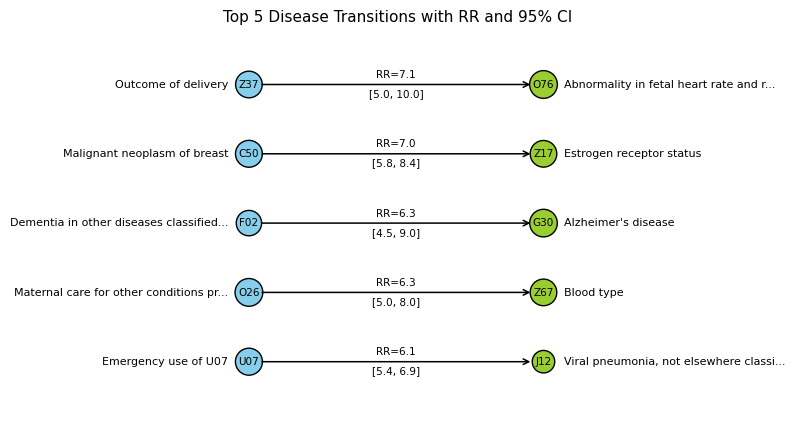

In [1268]:
import matplotlib.pyplot as plt
import pandas as pd

# Load
df_rrci = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/significant_edges_rr_named.csv").head(5)

def draw_rrci_compact_named(df, title='Top 5 Disease Transitions with RR and 95% CI'):
    n = len(df)
    fig, ax = plt.subplots(figsize=(8, 2.2 + n * 0.45))  
    ax.set_xlim(0, 1)
    y_positions = [0.9 - i * 0.18 for i in range(n)]  

    for i, (idx, row) in enumerate(df.iterrows()):
        y = y_positions[i]

        
        def shorten(text, maxlen=40):
            return text if len(text) <= maxlen else text[:maxlen - 3] + "..."

        # Left
        ax.text(0.01, y, shorten(row['source_name']), ha='right', va='center', fontsize=8)
        ax.text(0.07, y, row['source'], ha='center', va='center', fontsize=7.5,
                bbox=dict(boxstyle='circle', facecolor='skyblue', edgecolor='black'))

        # Right 
        ax.text(0.93, y, row['target'], ha='center', va='center', fontsize=7.5,
                bbox=dict(boxstyle='circle', facecolor='yellowgreen', edgecolor='black'))
        ax.text(0.99, y, shorten(row['target_name']), ha='left', va='center', fontsize=8)

        # Arrow
        ax.annotate("", xy=(0.90, y), xytext=(0.10, y),
                    arrowprops=dict(arrowstyle="->", lw=1.1))

        # RR  CI
        ax.text(0.50, y + 0.025, f"RR={row['rr']:.1f}", ha='center', va='center', fontsize=7.5)
        ax.text(0.50, y - 0.025, f"[{row['ci_low']:.1f}, {row['ci_high']:.1f}]", 
                ha='center', va='center', fontsize=7.5)

    ax.axis('off')
    fig.suptitle(title, fontsize=11)
    plt.tight_layout()
    plt.show()

# Draw
draw_rrci_compact_named(df_rrci)

## 4.5 Without xyz top 15 transitions paths

In [84]:
import pandas as pd
import numpy as np

# Read data
PATH = "/Users/yue/Desktop/MIMIC_IV/significant_edges_rr_named.csv"
df = pd.read_csv(PATH)


def pick(cols, options):
    for c in options:
        if c in cols:
            return c
    return None

cols = set(df.columns)
src = pick(cols, ["source","src","from_code","from"])
tgt = pick(cols, ["target","dst","to_code","to"])
rr  = pick(cols, ["RR","rr","relative_risk"])
cnt = pick(cols, ["count","n","num","patients","pair_count"])
cil = pick(cols, ["CI_low","ci_low","CI_l","ci_l","lower_ci"])
ciu = pick(cols, ["CI_high","ci_high","CI_u","ci_u","upper_ci"])
src_name = pick(cols, ["source_title","source_name","from_title","from_name","long_title_from"])
tgt_name = pick(cols, ["target_title","target_name","to_title","to_name","long_title_to"])

assert src and tgt and rr, "CSV must contain source, target, RR columns"

# Normalize types
df[src] = df[src].astype(str).str.upper().str.strip()
df[tgt] = df[tgt].astype(str).str.upper().str.strip()
df[rr]  = pd.to_numeric(df[rr], errors="coerce")
if cnt: df[cnt] = pd.to_numeric(df[cnt], errors="coerce")
if cil: df[cil] = pd.to_numeric(df[cil], errors="coerce")
if ciu: df[ciu] = pd.to_numeric(df[ciu], errors="coerce")
df = df[df[rr].notna()].copy()

# Global summary on full data 
total_transitions = int(df[cnt].sum()) if cnt and df[cnt].notna().any() else int(len(df))
unique_pairs = int(df.drop_duplicates([src, tgt]).shape[0])
unique_codes = int(pd.unique(pd.concat([df[src], df[tgt]], ignore_index=True)).size)
mean_rr   = float(df[rr].mean())
median_rr = float(df[rr].median())
rr_ge2 = int((df[rr] >= 2).sum())
rr_ge3 = int((df[rr] >= 3).sum())

# CI 
ci_available = cil in df.columns and ciu in df.columns
if ci_available:
    ci_width = (df[ciu] - df[cil]).dropna()
    ci_mean_width = float(ci_width.mean()) if len(ci_width) else np.nan
    ci_median_width = float(ci_width.median()) if len(ci_width) else np.nan
    ci_rows = int(df[ciu].notna().sum() if ciu else 0)
    ci_lower_gt1 = int((df[cil] > 1).sum())
else:
    ci_mean_width = np.nan
    ci_median_width = np.nan
    ci_rows = 0
    ci_lower_gt1 = 0

print("Total transitions", total_transitions)
print("Unique transitions (A->B)", unique_pairs)
print("Unique ICD-10 codes", unique_codes)
print("RR mean", round(mean_rr, 3))
print("RR median", round(median_rr, 3))
print("Transitions with RR>=2", rr_ge2)
print("Transitions with RR>=3", rr_ge3)
if ci_available:
    print("CI mean width", round(ci_mean_width, 3))
    print("CI median width", round(ci_median_width, 3))
    print("Rows with CI available", ci_rows)
    print("Rows with CI lower bound >1", ci_lower_gt1)

# Exclude X Y Z for extremes and Top 15 output with CI and names
df_noxyz = df[
    ~df[src].fillna("").str.startswith(("X","Y","Z")) &
    ~df[tgt].fillna("").str.startswith(("X","Y","Z"))
].copy()

if len(df_noxyz):
    row_max = df_noxyz.loc[df_noxyz[rr].idxmax()]
    row_min = df_noxyz.loc[df_noxyz[rr].idxmin()]
    max_ci = f" [{row_max[cil]:.3f}, {row_max[ciu]:.3f}]" if ci_available else ""
    min_ci = f" [{row_min[cil]:.3f}, {row_min[ciu]:.3f}]" if ci_available else ""
    print("Highest RR transition", f"{row_max[src]}->{row_max[tgt]}", round(float(row_max[rr]), 3), max_ci)
    print("Lowest RR transition", f"{row_min[src]}->{row_min[tgt]}", round(float(row_min[rr]), 3), min_ci)
else:
    print("Highest RR transition", "N/A")
    print("Lowest RR transition", "N/A")

# Top 15 by RR, include names and CI
sort_cols = [rr] + ([cnt] if cnt else [])
top15 = df_noxyz.sort_values(sort_cols, ascending=[False] * len(sort_cols)).head(15)

# make display columns
show_cols = [src, tgt]
if src_name: show_cols.insert(1, src_name)
if tgt_name: show_cols.append(tgt_name)
show_cols += [rr]
if ci_available: show_cols += [cil, ciu]
if cnt: show_cols += [cnt]

top15_out = top15[show_cols].copy()
print("\nTop 15 transitions excluding X/Y/Z with CI")
print(top15_out.to_string(index=False))

# save
top15_out.to_csv("/Users/yue/Desktop/MIMIC_IV/top15_paths_noXYZ_with_CI.csv", index=False)

Total transitions 1258
Unique transitions (A->B) 1258
Unique ICD-10 codes 469
RR mean 1.951
RR median 1.696
Transitions with RR>=2 480
Transitions with RR>=3 147
CI mean width 0.489
CI median width 0.379
Rows with CI available 1258
Rows with CI lower bound >1 1119
Highest RR transition F02->G30 6.339  [4.461, 9.009]
Lowest RR transition T84->D62 1.001  [0.908, 1.103]

Top 15 transitions excluding X/Y/Z with CI
source                                                                                               source_name target                                                                         target_name       rr   ci_low  ci_high
   F02                                                           Dementia in other diseases classified elsewhere    G30                                                                 Alzheimer's disease 6.339353 4.460717 9.009179
   U07                                                                                      Emergency use of U07    J12     

# 5. Build a directed graph

In [1270]:
import pandas as pd
import networkx as nx
import numpy as np

# Use existing RR significant transitions  
df_sig = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/significant_edges_rr.csv")

# Build RR weighted directed graph 
G = nx.DiGraph()
for row in df_sig.itertuples(index=False):
    G.add_edge(row.source, row.target, weight=row.RR, p=row.p_value)

# Print  
print(f'Graph nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}')

Graph nodes: 469, edges: 1258


In [1271]:
# Compute out-degree centrality for each node  
out_deg = nx.out_degree_centrality(G)
print("\nTop 50 Out-Degree Centrality Nodes:")
print(sorted(out_deg.items(), key=lambda x: x[1], reverse=True)[:10])


Top 50 Out-Degree Centrality Nodes:
[('J96', 0.061965811965811975), ('A41', 0.05555555555555556), ('O99', 0.047008547008547015), ('Z37', 0.038461538461538464), ('I50', 0.038461538461538464), ('R45', 0.038461538461538464), ('N17', 0.038461538461538464), ('E43', 0.032051282051282055), ('G93', 0.032051282051282055), ('E87', 0.02991452991452992)]


In [1272]:
# Extract edge list with RR and p-value 
edge_list = pd.DataFrame([
    {"source": u, "target": v, "RR": d["weight"], "p_value": d["p"]}
    for u, v, d in G.edges(data=True)
])

# Head
print(edge_list.head())

  source target        RR  p_value
0    Z37    O76  7.051077      0.0
1    Z37    O75  6.076674      0.0
2    Z37    Z30  5.206551      0.0
3    Z37    O32  4.771279      0.0
4    Z37    O72  4.564504      0.0


In [1273]:
# Save
edge_list.to_csv("/Users/yue/Desktop/MIMIC_IV/top_icd10_edges.csv", index=False)
print("Save completed.")

Save completed.


# 6. Markov Clustering Algorithm identifies disease clusters

## 6.1 Get clusters

In [1276]:
pip install markov_clustering

Note: you may need to restart the kernel to use updated packages.


In [1277]:
import markov_clustering as mc
import networkx as nx
import pandas as pd
import scipy.sparse as sp


# Convert to undirected graph for MCL 
G_undirected = G.to_undirected()

print(f"Step 1 Undirected graph — nodes: {G_undirected.number_of_nodes()}, edges: {G_undirected.number_of_edges()}")

Step 1 Undirected graph — nodes: 469, edges: 1059


In [1278]:
# Check
print(list(G_undirected.edges(data=True))[:5])  

[('Z37', 'O76', {'weight': 2.814616700941966, 'p': 0.0}), ('Z37', 'O75', {'weight': 2.5552287427021843, 'p': 6.6341925577e-313}), ('Z37', 'Z30', {'weight': 5.206550703755216, 'p': 0.0}), ('Z37', 'O32', {'weight': 2.8229646328874622, 'p': 0.0}), ('Z37', 'O72', {'weight': 3.046141210875695, 'p': 0.0})]


In [1279]:
# Build sparse adjacency matrix 
from networkx.convert_matrix import to_scipy_sparse_array

adj_matrix = to_scipy_sparse_array(G_undirected, weight='weight', dtype=float)

print("Step 2 Sparse adjacency matrix shape:", adj_matrix.shape)

Step 2 Sparse adjacency matrix shape: (469, 469)


In [1280]:
# Check
print("Adjacency matrix shape:", adj_matrix.shape)
print("Number of non-zero elements:", adj_matrix.nnz)

Adjacency matrix shape: (469, 469)
Number of non-zero elements: 2118


In [1281]:
# Check
print("Is adj_matrix sparse?", sp.issparse(adj_matrix))

Is adj_matrix sparse? True


In [1282]:
adj_matrix = sp.csr_matrix(adj_matrix)

# Perform Markov Clustering  

import markov_clustering as mc

inflation = 1.8  
result = mc.run_mcl(adj_matrix, inflation=inflation)  
clusters = mc.get_clusters(result)  

print(f"Step 3 MCL completed – {len(clusters)} clusters detected (inflation={inflation})")

Step 3 MCL completed – 80 clusters detected (inflation=1.8)


## 6.2 Clusters save

In [1284]:
import networkx as nx
import pandas as pd
import scipy.sparse as sp
import markov_clustering as mc
import pickle
data_path = '/Users/yue/Desktop/MIMIC_IV/'

# Save undirected graph 
G_undirected = G.to_undirected()

# Save undirected graph in GML format for future use 
nx.write_gml(G_undirected, f"{data_path}undirected_graph.gml")

# Save sparse adjacency matrix 

sp.save_npz(f"{data_path}adjacency_matrix.npz", adj_matrix)

# Save clustering result as pickle
inflation = 1.8
result = mc.run_mcl(adj_matrix, inflation=inflation)
clusters = mc.get_clusters(result)

# Save 
with open(f"{data_path}clusters.pkl", 'wb') as f:
    pickle.dump(clusters, f)

print("Step 1, 2, and 3 results have been saved successfully!")

Step 1, 2, and 3 results have been saved successfully!


In [1285]:
import pandas as pd
import markov_clustering as mc
import scipy.sparse as sp

data_path = '/Users/yue/Desktop/MIMIC_IV/'

# Save clustering result as CSV
inflation = 1.8
result = mc.run_mcl(adj_matrix, inflation=inflation)
clusters = mc.get_clusters(result)

clusters_dict = {f"Cluster {i+1}": cluster for i, cluster in enumerate(clusters)}

# Convert cluster members to DataFrame
df_clusters = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in clusters_dict.items()]))

# Save
df_clusters.to_csv(f"{data_path}clusters.csv", index=False)

print("Clusters have been saved as 'clusters.csv'!")

Clusters have been saved as 'clusters.csv'!


## 6.3 Clusters to ICD-10

In [1287]:
# Get index to ICD code mapping 
index_to_icd = dict(enumerate(G.nodes()))

cluster_icd_list = []
for cluster in clusters:
    icd_cluster = [index_to_icd[i] for i in cluster]
    cluster_icd_list.append(icd_cluster)

# Build the mapping dictionary 
clusters_dict = {f"Cluster {i+1}": icd_list for i, icd_list in enumerate(cluster_icd_list)}

#  Convert to DataFrame
df_clusters = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in clusters_dict.items()]))

#  Save  
data_path = '/Users/yue/Desktop/MIMIC_IV/'
df_clusters.to_csv(f"{data_path}mcl_clusters_icd.csv", index=False)

print("save as 'mcl_clusters_icd.csv'！")

save as 'mcl_clusters_icd.csv'！


In [1288]:
import pandas as pd
import os

base_path = '/Users/yue/Desktop/MIMIC_IV/'         
input_file = os.path.join(base_path, 'mcl_clusters_icd.csv')

df = pd.read_csv(input_file)

# Count number of ICDs in each cluster 
cluster_sizes = df.count()

# Save master file for clusters with at least 2 ICDs  
ge2_cols = cluster_sizes[cluster_sizes >= 2].index            
dir_ge2 = os.path.join(base_path, 'clusters_size_ge2')
os.makedirs(dir_ge2, exist_ok=True)

df_ge2 = df[ge2_cols].dropna(how='all')                       
df_ge2.to_csv(os.path.join(dir_ge2, 'clusters_size_ge2.csv'), index=False)

with open(os.path.join(dir_ge2, 'README.txt'), 'w') as f:
    f.write(f"Total clusters with size ≥ 2: {len(ge2_cols)}\n")

print(f" save as cluster_sizes >=2 ICD ，total {len(ge2_cols)}clusters")

 save as cluster_sizes >=2 ICD ，total 74clusters


In [1289]:
# Save clusters with size ≥ N 
for min_size in range(3, 11):
    cols = cluster_sizes[cluster_sizes >= min_size].index
    if len(cols) == 0:
        continue

    size_dir = os.path.join(base_path, f'clusters_size_ge{min_size}')
    os.makedirs(size_dir, exist_ok=True)

    sub_df = df[cols].dropna(how='all')
    sub_df.to_csv(os.path.join(size_dir, f'clusters_size_ge{min_size}.csv'), index=False)

    with open(os.path.join(size_dir, 'README.txt'), 'w') as f:
        f.write(f"Number of clusters with size ≥ {min_size}: {len(cols)}\n")

    print(f" Saved clusters_size_ge{min_size}/ with {len(cols)} clusters")

print(" All cluster subsets have been saved!")

 Saved clusters_size_ge3/ with 49 clusters
 Saved clusters_size_ge4/ with 38 clusters
 Saved clusters_size_ge5/ with 29 clusters
 Saved clusters_size_ge6/ with 19 clusters
 Saved clusters_size_ge7/ with 17 clusters
 Saved clusters_size_ge8/ with 14 clusters
 Saved clusters_size_ge9/ with 13 clusters
 Saved clusters_size_ge10/ with 11 clusters
 All cluster subsets have been saved!


## 6.4 Extract directed paths from clusters

In [1291]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [1292]:
# Load 
import pandas as pd
import ast

# Read undirected clusters 
df_clusters = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/clusters_size_ge3/clusters_size_ge3.csv")

# Read significant directed edges
df_edges = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/significant_edges_rr.csv")

# Read diagnosis data 
df_diag = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz")
df_diag = df_diag[['subject_id', 'hadm_id', 'icd_code_3char', 'seq_num']]
df_diag = df_diag.dropna()

# Sort 
df_diag = df_diag.sort_values(by=['subject_id', 'hadm_id', 'seq_num'])

# Build diagnosis sequence for each hadm_id
hadm_icd_dict = df_diag.groupby('hadm_id')['icd_code_3char'].apply(list).to_dict()

# Convert RR edges into set form for lookup
edge_set = set(zip(df_edges['source'], df_edges['target']))

In [1293]:
# Generate real paths from undirected clusters   
paths = []

for col in df_clusters.columns:
    cluster = df_clusters[col].dropna().tolist()
    cluster = [c.strip().strip("'") for c in cluster if isinstance(c, str)]
    
    # Ignore clusters with size less than 3 
    if len(cluster) < 3:
        continue

    # Iterate over ICD sequences of each hadm_id
    for hadm_id, seq in hadm_icd_dict.items():
        path = []
        for icd in seq:
            if icd in cluster:
                if not path or icd != path[-1]:
                    path.append(icd)

        # Extract paths that form continuous chains in RR edges
        if len(path) >= 3:
            valid = True
            for i in range(len(path) - 1):
                if (path[i], path[i + 1]) not in edge_set:
                    valid = False
                    break
            if valid:
                paths.append(tuple(path))

In [1294]:
# Aggregate and visualize top 50 frequent paths
from collections import Counter

# Count path frequency
path_counter = Counter(paths)

# Sort by occurrence count
top_paths = path_counter.most_common(50)

# Convert to DataFrame and save
df_top_paths = pd.DataFrame(top_paths, columns=['path', 'count'])

# Read top 5 paths
df_top_paths.head()

,path,count
0,"(N17, E87, E86)",1912
1,"(N17, E87, E83)",1369
2,"(I12, N18, D63)",1016
3,"(I12, N18, M10)",952
4,"(N18, I12, Z99)",942


In [1295]:
# Save
df_top_paths.to_csv("/Users/yue/Desktop/MIMIC_IV/top50_cluster_paths.csv", index=False)
print("Success.")

Success.


## 6.5 Stratified analysis

In [1297]:
import pandas as pd
import ast
from collections import Counter
from tqdm import tqdm

# Path 
base_dir = "/Users/yue/Desktop/MIMIC_IV/"
cluster_dir_prefix = "clusters_size_ge"
output_prefix = "top5_cluster_paths_ge"

# RR edge data 
df_edges = pd.read_csv(base_dir + "significant_edges_rr.csv")
edge_set = set(zip(df_edges['source'], df_edges['target']))

# Diagnosis sequence data
df_diag = pd.read_csv(base_dir + "diagnoses_icd_named.csv.gz", usecols=["subject_id", "hadm_id", "icd_code_3char", "seq_num"])
df_diag = df_diag.dropna()
df_diag = df_diag.sort_values(by=["subject_id", "hadm_id", "seq_num"])
hadm_icd_dict = df_diag.groupby("hadm_id")["icd_code_3char"].apply(list).to_dict()

# Main loop Extract paths for clusters 
for k in range(2, 11):
    cluster_file = f"{base_dir}{cluster_dir_prefix}{k}/clusters_size_ge{k}.csv"
    df_clusters = pd.read_csv(cluster_file)

    paths = []
    for col in df_clusters.columns:
        cluster = df_clusters[col].dropna().tolist()
        cluster = [c.strip().strip('"') for c in cluster if isinstance(c, str)]
        if len(cluster) < k:
            continue

        for hadm_id, seq in hadm_icd_dict.items():
            path = []
            for icd in seq:
                if icd in cluster:
                    if not path or icd != path[-1]:
                        path.append(icd)

            if len(path) >= k:
                valid = True
                for i in range(len(path) - 1):
                    if (path[i], path[i + 1]) not in edge_set:
                        valid = False
                        break
                if valid:
                    paths.append(tuple(path))

    # Count top 5 most frequent paths 
    path_counter = Counter(paths)
    top_paths = path_counter.most_common(5)
    df_top_paths = pd.DataFrame(top_paths, columns=["path", "count"])

    # Save
    df_top_paths.to_csv(f"{base_dir}{output_prefix}{k}.csv", index=False)
    print(f"Saved top 5 for cluster size {k}")

Saved top 5 for cluster size 2
Saved top 5 for cluster size 3
Saved top 5 for cluster size 4
Saved top 5 for cluster size 5
Saved top 5 for cluster size 6
Saved top 5 for cluster size 7
Saved top 5 for cluster size 8
Saved top 5 for cluster size 9
Saved top 5 for cluster size 10


In [1298]:
# Head check
import pandas as pd

base_dir = "/Users/yue/Desktop/MIMIC_IV/"
output_prefix = "top5_cluster_paths_ge"  

for k in range(2, 11):
    file_path = f"{base_dir}{output_prefix}{k}.csv"
    print(f"\n===== Top 5 Paths for Cluster Size {k} =====")
    df = pd.read_csv(file_path)
    print(df)


===== Top 5 Paths for Cluster Size 2 =====
             path  count
0  ('E66', 'Z68')  17715
1  ('I12', 'N18')  10002
2  ('N17', 'E87')   8715
3  ('Z68', 'E66')   8013
4  ('I25', 'Z95')   5103

===== Top 5 Paths for Cluster Size 3 =====
                    path  count
0  ('N17', 'E87', 'E86')   1912
1  ('N17', 'E87', 'E83')   1369
2  ('I12', 'N18', 'D63')   1016
3  ('I12', 'N18', 'M10')    952
4  ('N18', 'I12', 'Z99')    942

===== Top 5 Paths for Cluster Size 4 =====
                           path  count
0  ('N18', 'I12', 'Z99', 'D63')    507
1  ('I13', 'I50', 'I25', 'Z95')    389
2  ('I12', 'N18', 'Z99', 'D63')    228
3  ('I11', 'I50', 'I25', 'Z95')    165
4  ('I63', 'G81', 'R47', 'R29')    152

===== Top 5 Paths for Cluster Size 5 =====
                                  path  count
0  ('I21', 'I13', 'I50', 'I25', 'Z95')     52
1  ('I21', 'I50', 'I13', 'I25', 'Z95')     34
2  ('I63', 'I61', 'G81', 'R47', 'R29')     32
3  ('I63', 'G81', 'R29', 'R47', 'R29')     24
4  ('I63', 'G81', 

In [1299]:
import pandas as pd
import ast

# Load 
map_df = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/d_icd_diagnoses.csv.gz")
map_df = map_df[map_df["icd_version"] == 10]
map_df["icd_code_3char"] = map_df["icd_code"].str[:3]
map_df = map_df.drop_duplicates("icd_code_3char")
icd2name = dict(zip(map_df["icd_code_3char"], map_df["long_title"]))

# Set file path prefix 
base_dir = "/Users/yue/Desktop/MIMIC_IV/"
file_prefix = "top5_cluster_paths_ge"  

# Batch process path tables with size from 2 to 1
for k in range(2, 11):
    path_file = f"{base_dir}{file_prefix}{k}.csv"
    df = pd.read_csv(path_file)

    
    def path_to_names(path_str):
        try:
            codes = ast.literal_eval(path_str)
            names = [icd2name.get(code.strip("' "), code) for code in codes]
            return " → ".join(names)
        except:
            return ""

    df["name"] = df["path"].apply(path_to_names)

    print(df.head())

    # Save
    out_file = f"{base_dir}{file_prefix}{k}_with_names.csv"
    df.to_csv(out_file, index=False)
    print(f" Saved: {out_file}")

             path  count                                               name
0  ('E66', 'Z68')  17715     Overweight and obesity → Body mass index [BMI]
1  ('I12', 'N18')  10002  Hypertensive chronic kidney disease → Chronic ...
2  ('N17', 'E87')   8715  Acute kidney failure → Other disorders of flui...
3  ('Z68', 'E66')   8013     Body mass index [BMI] → Overweight and obesity
4  ('I25', 'Z95')   5103  Chronic ischemic heart disease → Presence of c...
 Saved: /Users/yue/Desktop/MIMIC_IV/top5_cluster_paths_ge2_with_names.csv
                    path  count  \
0  ('N17', 'E87', 'E86')   1912   
1  ('N17', 'E87', 'E83')   1369   
2  ('I12', 'N18', 'D63')   1016   
3  ('I12', 'N18', 'M10')    952   
4  ('N18', 'I12', 'Z99')    942   

                                                name  
0  Acute kidney failure → Other disorders of flui...  
1  Acute kidney failure → Other disorders of flui...  
2  Hypertensive chronic kidney disease → Chronic ...  
3  Hypertensive chronic kidney disease 

## 6.5 Without xyz paths

In [88]:
# Load 
import pandas as pd
from collections import Counter
import ast
from tqdm import tqdm

BASE_DIR = "/Users/yue/Desktop/MIMIC_IV/"
CLUSTER_DIR_PREFIX = "clusters_size_ge"
OUT_PREFIX = "top15_cluster_paths_ge"

# significant edges for validation 
edges_df = pd.read_csv(BASE_DIR + "significant_edges_rr.csv")
edge_set = set(zip(edges_df["source"], edges_df["target"]))

# ICD-10 3char to long title mapping
map_df = pd.read_csv(BASE_DIR + "d_icd_diagnoses.csv.gz")
map_df = map_df[map_df["icd_version"] == 10].copy()
map_df["icd_code_3char"] = map_df["icd_code"].astype(str).str[:3]
map_df = map_df.drop_duplicates("icd_code_3char")
icd2name = dict(zip(map_df["icd_code_3char"], map_df["long_title"]))

# diagnosis sequences by admission
diag = pd.read_csv(
    BASE_DIR + "diagnoses_icd_named.csv.gz",
    usecols=["subject_id", "hadm_id", "seq_num", "icd_code_3char"]
).dropna(subset=["icd_code_3char"])

diag = diag.sort_values(["subject_id", "hadm_id", "seq_num"])
hadm_icd_dict = diag.groupby("hadm_id")["icd_code_3char"].apply(list).to_dict()


# helper functions
def clean_cluster(col_values):
    """Turn a clusters csv column into a cleaned list of 3-char ICD codes."""
    items = pd.Series(col_values).dropna().tolist()
    return [str(x).strip().strip("'") for x in items if isinstance(x, (str, int))]

def extract_paths_for_cluster(cluster_codes, k):
    """Scan every admission, keep ordered in-cluster sequences of length >= k,
       require every adjacent pair in significant edge set."""
    if len(cluster_codes) < k:
        return []

    codeset = set(cluster_codes)
    paths = []

    for _, seq in hadm_icd_dict.items():
        # subsequence within cluster, drop adjacent duplicates
        path = []
        for code in seq:
            if code in codeset:
                if not path or code != path[-1]:
                    path.append(code)

        # slide windows of length >= k that satisfy edges
        if len(path) >= k:
            # enumerate all contiguous windows of length L >= k
            for L in range(k, len(path) + 1):
                for i in range(0, len(path) - L + 1):
                    win = path[i:i+L]
                    # all adjacent pairs must be in edge_set
                    ok = True
                    for j in range(len(win) - 1):
                        if (win[j], win[j+1]) not in edge_set:
                            ok = False
                            break
                    if ok:
                        paths.append(tuple(win))
    return paths

def add_names(path_tuple):
    names = [icd2name.get(c, c) for c in path_tuple]
    return " → ".join(names)


# process cluster sizes 2 3 4 5 and save top 15 with names
for k in [2, 3, 4, 5]:
    cluster_file = f"{BASE_DIR}{CLUSTER_DIR_PREFIX}{k}/clusters_size_ge{k}.csv"
    df_clusters = pd.read_csv(cluster_file)

    all_paths = []
    # each column is a cluster
    for col in tqdm(df_clusters.columns, desc=f"size {k}"):
        cluster_codes = clean_cluster(df_clusters[col])
        if not cluster_codes:
            continue
        all_paths.extend(extract_paths_for_cluster(cluster_codes, k))

    # top 15
    counts = Counter(all_paths).most_common(15)
    out_df = pd.DataFrame(counts, columns=["path_codes", "count"])
    out_df["path_codes_str"] = out_df["path_codes"].apply(lambda t: " → ".join(t))
    out_df["path_names"] = out_df["path_codes"].apply(add_names)

    # tidy columns
    out_df = out_df[["path_codes_str", "path_names", "count"]]
    out_df = out_df.rename(columns={
        "path_codes_str": "path_codes"
    })

    out_path = f"{BASE_DIR}{OUT_PREFIX}{k}_with_names.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved top 15 for cluster size {k} to {out_path}")

size 2: 100%|███████████████████████████████████| 74/74 [00:05<00:00, 14.00it/s]


Saved top 15 for cluster size 2 to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge2_with_names.csv


size 3: 100%|███████████████████████████████████| 49/49 [00:03<00:00, 13.77it/s]


Saved top 15 for cluster size 3 to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge3_with_names.csv


size 4: 100%|███████████████████████████████████| 38/38 [00:02<00:00, 14.04it/s]


Saved top 15 for cluster size 4 to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge4_with_names.csv


size 5: 100%|███████████████████████████████████| 29/29 [00:01<00:00, 15.11it/s]

Saved top 15 for cluster size 5 to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge5_with_names.csv


In [92]:
#  Load 
import pandas as pd
from collections import Counter
from tqdm import tqdm

BASE_DIR = "/Users/yue/Desktop/MIMIC_IV/"
CLUSTER_DIR_PREFIX = "clusters_size_ge"
OUT_PREFIX = "top15_cluster_paths_ge"

# significant edges for validation
edges_df = pd.read_csv(BASE_DIR + "significant_edges_rr.csv")
edge_set = set(zip(edges_df["source"], edges_df["target"]))

# ICD-10 3char to long title mapping
map_df = pd.read_csv(BASE_DIR + "d_icd_diagnoses.csv.gz")
map_df = map_df[map_df["icd_version"] == 10].copy()
map_df["icd_code_3char"] = map_df["icd_code"].astype(str).str[:3]
map_df = map_df.drop_duplicates("icd_code_3char")
icd2name = dict(zip(map_df["icd_code_3char"], map_df["long_title"]))

# diagnosis sequences by admission
diag = pd.read_csv(
    BASE_DIR + "diagnoses_icd_named.csv.gz",
    usecols=["subject_id", "hadm_id", "seq_num", "icd_code_3char"]
).dropna(subset=["icd_code_3char"])

diag = diag.sort_values(["subject_id", "hadm_id", "seq_num"])
hadm_icd_dict = diag.groupby("hadm_id")["icd_code_3char"].apply(list).to_dict()


def is_xyz(code: str) -> bool:
    """Returns True if code starts with X, Y, or Z."""
    return isinstance(code, str) and len(code) > 0 and code[0] in ("X", "Y", "Z")

def clean_cluster(col_values):
    """Convert one cluster column to a list of ICD-10 3-char codes, removing X/Y/Z."""
    items = pd.Series(col_values).dropna().astype(str).str.strip().str.strip("'").tolist()
    return [c for c in items if c and not is_xyz(c)]

def extract_paths_for_cluster(cluster_codes, k):
    """
    Scan each admission; build ordered in-cluster sequences (X/Y/Z already removed),
    keep contiguous windows of length >= k, and require every adjacent pair in edge_set.
    """
    if len(cluster_codes) < k:
        return []

    codeset = set(cluster_codes)
    paths = []

    for _, seq in hadm_icd_dict.items():
        # keep only codes inside this cluster and not X/Y/Z
        seq_clean = [c for c in seq if c in codeset and not is_xyz(c)]

        # drop immediate duplicates
        path = []
        for code in seq_clean:
            if not path or code != path[-1]:
                path.append(code)

        if len(path) >= k:
            for L in range(k, len(path) + 1):
                for i in range(0, len(path) - L + 1):
                    win = path[i:i+L]
                    # all adjacent pairs must be significant
                    if all((win[j], win[j+1]) in edge_set for j in range(len(win) - 1)):
                        paths.append(tuple(win))
    return paths

def add_names(path_tuple):
    names = [icd2name.get(c, c) for c in path_tuple]
    return " → ".join(names)

# process sizes 2,3,4,5 and save Top-15 
for k in [2, 3, 4, 5]:
    cluster_file = f"{BASE_DIR}{CLUSTER_DIR_PREFIX}{k}/clusters_size_ge{k}.csv"
    df_clusters = pd.read_csv(cluster_file)

    all_paths = []
    for col in tqdm(df_clusters.columns, desc=f"size {k}"):
        cluster_codes = clean_cluster(df_clusters[col])
        if not cluster_codes:
            continue
        all_paths.extend(extract_paths_for_cluster(cluster_codes, k))

    counts = Counter(all_paths).most_common(15)
    out_df = pd.DataFrame(counts, columns=["path_codes", "count"])
    out_df["path_codes"] = out_df["path_codes"].apply(lambda t: " → ".join(t))
    out_df["path_names"] = out_df["path_codes"].apply(
        lambda s: " → ".join(icd2name.get(c, c) for c in [x.strip() for x in s.split("→")])
    )

    out_df = out_df[["path_codes", "path_names", "count"]]
    out_path = f"{BASE_DIR}{OUT_PREFIX}{k}_with_names_noXYZ.csv"
    out_df.to_csv(out_path, index=False)
    print(f"Saved top 15 for cluster size {k} (no X/Y/Z) to {out_path}")

size 2: 100%|███████████████████████████████████| 74/74 [00:05<00:00, 13.17it/s]


Saved top 15 for cluster size 2 (no X/Y/Z) to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge2_with_names_noXYZ.csv


size 3: 100%|███████████████████████████████████| 49/49 [00:03<00:00, 13.13it/s]


Saved top 15 for cluster size 3 (no X/Y/Z) to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge3_with_names_noXYZ.csv


size 4: 100%|███████████████████████████████████| 38/38 [00:03<00:00, 11.71it/s]


Saved top 15 for cluster size 4 (no X/Y/Z) to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge4_with_names_noXYZ.csv


size 5: 100%|███████████████████████████████████| 29/29 [00:02<00:00, 12.95it/s]

Saved top 15 for cluster size 5 (no X/Y/Z) to /Users/yue/Desktop/MIMIC_IV/top15_cluster_paths_ge5_with_names_noXYZ.csv


## 6.6 Top 5 Disease Paths with Count (Path Length ≥ 3)  with xyz

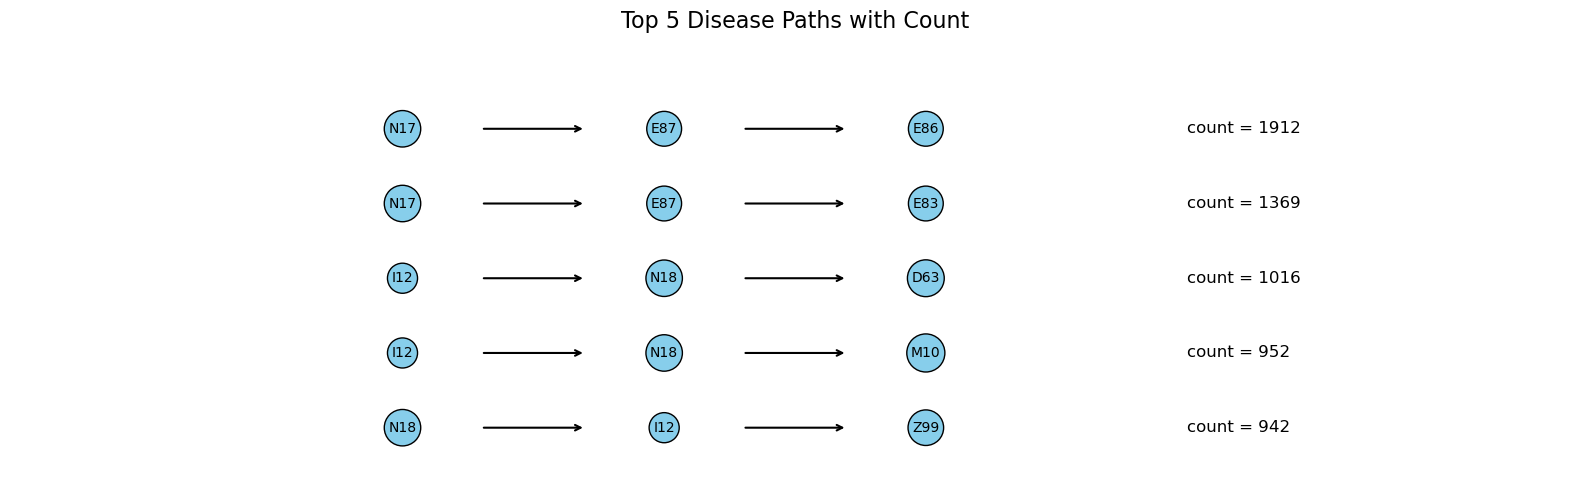

In [1301]:
import pandas as pd
import matplotlib.pyplot as plt

# Read top 5 paths
df_top_paths = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/top50_cluster_paths.csv").head(5)

 
fig_height = len(df_top_paths) * 1.0
fig, ax = plt.subplots(figsize=(16, fig_height))


for i, row in df_top_paths.iterrows():
    path = eval(row['path'])  
    count = row['count']
    path_len = len(path)
    y = len(df_top_paths) - i

    # Center starting position of the plot 
    start_x = (10 - (path_len - 1) * 2) / 2

    for j, icd in enumerate(path):
        x = start_x + j * 2
        ax.text(x, y, icd, ha='center', va='center',
                bbox=dict(boxstyle="circle", fc="skyblue", ec="black"))

        if j < path_len - 1:
            ax.annotate("",
                        xy=(x + 1.4, y), xytext=(x + 0.6, y),
                        arrowprops=dict(arrowstyle="->", lw=1.5, color="black"))

    # Show count
    ax.text(x + 2.0, y, f"count = {count}", va='center', fontsize=12, color='black')

# title position 
ax.set_title("Top 5 Disease Paths with Count", fontsize=16, loc='center', pad=8)

# Figure
ax.set_xlim(0, 12)
ax.set_ylim(0.3, len(df_top_paths) + 1.2)
ax.axis('off')
plt.tight_layout()
plt.show()

# 7. Analysis

## 7.1 Load input and compute PageRank for global node importance

In [1304]:
import pandas as pd
import networkx as nx
import ast  # Used to convert string to list 

# Load 
top_path_file = "/Users/yue/Desktop/MIMIC_IV/top50_cluster_paths.csv"
df_path = pd.read_csv(top_path_file)   

# Load significant edges  
edge_file = "/Users/yue/Desktop/MIMIC_IV/significant_edges_rr.csv"
df_edge = pd.read_csv(edge_file)

# Build directed graph and compute PageRank
G = nx.DiGraph()
for _, r in df_edge.iterrows():
    G.add_edge(r["source"], r["target"], weight=r["RR"])

pr_dict = nx.pagerank(G, weight="weight")  

# Convert string to list and calculate average PageRank
df_path["code_seq"] = df_path["path"].apply(ast.literal_eval)

def avg_pr(codes):
    return sum(pr_dict.get(c, 0) for c in codes) / len(codes)

df_path["pagerank_mean"] = df_path["code_seq"].apply(avg_pr)

# Print  
print(df_path.head())

                    path  count         code_seq  pagerank_mean
0  ('N17', 'E87', 'E86')   1912  (N17, E87, E86)       0.001165
1  ('N17', 'E87', 'E83')   1369  (N17, E87, E83)       0.001162
2  ('I12', 'N18', 'D63')   1016  (I12, N18, D63)       0.001275
3  ('I12', 'N18', 'M10')    952  (I12, N18, M10)       0.000921
4  ('N18', 'I12', 'Z99')    942  (N18, I12, Z99)       0.001324


In [1305]:
# Save
df_path.to_csv("/Users/yue/Desktop/MIMIC_IV/top50_paths_with_pagerank.csv", index=False)

print("Succes.")

Succes.


## 7.2 Build path to hadm_id list mapping 

In [1307]:
# Build mapping from path to hadm_id  
import ast
from tqdm import tqdm

diag_file = "/Users/yue/Desktop/MIMIC_IV/diagnoses_icd_named.csv.gz"
df_diag = pd.read_csv(diag_file, usecols=["hadm_id", "seq_num", "icd_code_3char"])
df_diag = df_diag.sort_values(["hadm_id", "seq_num"])

# Create ICD sequence list for each hadm_id 
hadm2seq = df_diag.groupby("hadm_id")["icd_code_3char"].apply(list).to_dict()

# Convert path string to list 
df_path["code_seq"] = df_path["path"].apply(ast.literal_eval)

# Define matching function 
def is_subseq(sub, full):
    it = iter(full)
    return all(any(c == x for x in it) for c in sub)

# Build path to hadm_id mapping table
path2hadm = {p: [] for p in df_path["path"]}
for hadm_id, seq in tqdm(hadm2seq.items(), desc="match"):
    for p, codes in zip(df_path["path"], df_path["code_seq"]):
        if is_subseq(codes, seq):
            path2hadm[p].append(hadm_id)

# Count number of mappings 
df_path["n_matched"] = df_path["path"].apply(lambda p: len(path2hadm[p]))

# Save 
df_path["path_hadm_ids"] = df_path["path"].apply(lambda p: path2hadm[p])

# Head 
print(df_path.head())

match: 100%|█████████████████████████| 254377/254377 [00:11<00:00, 22730.08it/s]

                    path  count         code_seq  pagerank_mean  n_matched  \
0  ('N17', 'E87', 'E86')   1912  (N17, E87, E86)       0.001165       3505   
1  ('N17', 'E87', 'E83')   1369  (N17, E87, E83)       0.001162       3395   
2  ('I12', 'N18', 'D63')   1016  (I12, N18, D63)       0.001275       1799   
3  ('I12', 'N18', 'M10')    952  (I12, N18, M10)       0.000921       1396   
4  ('N18', 'I12', 'Z99')    942  (N18, I12, Z99)       0.001324       2235   

                                       path_hadm_ids  
0  [20002003, 20003465, 20003543, 20005525, 20009...  
1  [20001770, 20003543, 20004773, 20013976, 20014...  
2  [20005705, 20018070, 20019567, 20027677, 20040...  
3  [20011618, 20014005, 20017382, 20020517, 20042...  
4  [20009759, 20013465, 20017926, 20018154, 20021...  


In [1308]:
# Save
df_path.to_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_with_hadm_ids.csv", index=False)
print("Succes.")

Succes.


## 7.3 Bootstrap Validation

In [1310]:
import pandas as pd
import random
from ast import literal_eval
from tqdm import tqdm

# Load 
df_path = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_with_hadm_ids.csv")

# Convert path_hadm_ids column from string to list
df_path["path_hadm_ids"] = df_path["path_hadm_ids"].apply(literal_eval)

# Build a reverse mapping
hadm2paths = {}
for path, hadm_ids in zip(df_path["path"], df_path["path_hadm_ids"]):
    for h in hadm_ids:
        hadm2paths.setdefault(h, []).append(path)

# Prepare bootstrap settings
all_hadm_ids = list(hadm2paths.keys())
path_counter = {p: 0 for p in df_path["path"]}
N_BOOTSTRAP = 1000
SAMPLE_RATIO = 0.8  # Sample 80% patients in each iteration

# Run bootstrap sampling
for _ in tqdm(range(N_BOOTSTRAP), desc="Bootstrap"):
    sampled_hadm = set(random.sample(all_hadm_ids, int(len(all_hadm_ids) * SAMPLE_RATIO)))
    seen_paths = set()
    for h in sampled_hadm:
        for p in hadm2paths.get(h, []):
            seen_paths.add(p)
    for p in seen_paths:
        path_counter[p] += 1

# Assign stability frequency to dataframe
df_path["bootstrap_freq"] = df_path["path"].map(path_counter).apply(lambda x: x / N_BOOTSTRAP)

# Show 
print(df_path[["path", "count", "bootstrap_freq"]].head())

Bootstrap: 100%|████████████████████████████| 1000/1000 [00:14<00:00, 70.07it/s]

                    path  count  bootstrap_freq
0  ('N17', 'E87', 'E86')   1912             1.0
1  ('N17', 'E87', 'E83')   1369             1.0
2  ('I12', 'N18', 'D63')   1016             1.0
3  ('I12', 'N18', 'M10')    952             1.0
4  ('N18', 'I12', 'Z99')    942             1.0


In [1311]:
# Save
df_path.to_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_with_stability.csv", index=False)
print("Bootstrap validation finished and saved to 'top_paths_with_stability.csv'.")

Bootstrap validation finished and saved to 'top_paths_with_stability.csv'.


## 7.4 Merge with admissions to calculate gender distribution 

### 7.4.1 With xyz

In [1313]:
# Load 
adm_file = "/Users/yue/Desktop/MIMIC_IV/admissions.csv.gz"
df_adm = pd.read_csv(adm_file, usecols=["hadm_id", "subject_id"])

# Load  
patients_file = "/Users/yue/Desktop/MIMIC_IV/patients.csv.gz"
df_pat = pd.read_csv(patients_file, usecols=["subject_id", "gender"])

# Merge the two tables to get gender for each hadm_id 
df_merged = df_adm.merge(df_pat, on="subject_id", how="left")  

# Initialize result container
male_counts = []
female_counts = []

# Iterate over paths to count number of males and females matched  
for p in df_path["path"]:
    matched_ids = path2hadm[p]
    sub = df_merged[df_merged["hadm_id"].isin(matched_ids)]
    male_counts.append((sub["gender"] == "M").sum())
    female_counts.append((sub["gender"] == "F").sum())

#  Add result columns to final table
df_path["male_count"] = male_counts
df_path["female_count"] = female_counts
df_path["male_rate"] = df_path["male_count"] / (df_path["male_count"] + df_path["female_count"]).replace(0, 1)

print(df_path.head())

                    path  count               code_seq  pagerank_mean  \
0  ('N17', 'E87', 'E86')   1912  ('N17', 'E87', 'E86')       0.001165   
1  ('N17', 'E87', 'E83')   1369  ('N17', 'E87', 'E83')       0.001162   
2  ('I12', 'N18', 'D63')   1016  ('I12', 'N18', 'D63')       0.001275   
3  ('I12', 'N18', 'M10')    952  ('I12', 'N18', 'M10')       0.000921   
4  ('N18', 'I12', 'Z99')    942  ('N18', 'I12', 'Z99')       0.001324   

   n_matched                                      path_hadm_ids  \
0       3505  [20002003, 20003465, 20003543, 20005525, 20009...   
1       3395  [20001770, 20003543, 20004773, 20013976, 20014...   
2       1799  [20005705, 20018070, 20019567, 20027677, 20040...   
3       1396  [20011618, 20014005, 20017382, 20020517, 20042...   
4       2235  [20009759, 20013465, 20017926, 20018154, 20021...   

   bootstrap_freq  male_count  female_count  male_rate  
0             1.0        1925          1580   0.549215  
1             1.0        1891          1504 

In [1314]:
# save
df_path.to_csv("/Users/yue/Desktop/MIMIC_IV/top50_paths_with_gender_pr.csv", index=False)
print("Success.")

Success.


In [1315]:
import pandas as pd
from scipy.stats import fisher_exact

# Loading
df_path = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/top50_paths_with_gender_pr.csv")

# Set the true population gender distribution
overall_male = 172643
overall_female = 191984

# Calculate gender significance (p-value) for each path
def compute_p(row):
    table = [[row['male_count'], row['female_count']],
             [overall_male, overall_female]]
    _, p = fisher_exact(table)
    return p

df_path['p_value_gender'] = df_path.apply(compute_p, axis=1)

In [1316]:
# Add gender bias label
def label_gender_bias(row):
    if row['male_rate'] > 0.6:
        return "Male-biased"
    elif row['male_rate'] < 0.4:
        return "Female-biased"
    else:
        return "Neutral"

df_path['gender_bias_type'] = df_path.apply(label_gender_bias, axis=1)

In [1317]:
# Filter significant gender-biased paths 
female_biased_paths = df_path[
    (df_path['gender_bias_type'] == "Female-biased") &
    (df_path['p_value_gender'] < 0.05)
].sort_values(by='female_count', ascending=False)

male_biased_paths = df_path[
    (df_path['gender_bias_type'] == "Male-biased") &
    (df_path['p_value_gender'] < 0.05)
].sort_values(by='male_count', ascending=False)

In [1473]:
# Compare
top_male_paths = male_biased_paths.head(30).copy()
top_female_paths = female_biased_paths.head(30).copy()

top_male_paths["group"] = "Male"
top_female_paths["group"] = "Female"

comparison = pd.concat([top_male_paths, top_female_paths])

print("Top 30 Gender-biased Paths:")
print(comparison[['group', 'path', 'male_count', 'female_count', 'male_rate', 'p_value_gender']])

Top 30 Gender-biased Paths:
     group                          path  male_count  female_count  male_rate  \
15    Male         ('I50', 'I25', 'Z95')        7089          3414   0.674950   
9     Male         ('I13', 'I50', 'I25')        4155          2148   0.659210   
48    Male         ('I13', 'I50', 'Z95')        3335          1619   0.673193   
10    Male         ('I13', 'I50', 'I48')        3058          1888   0.618277   
12    Male  ('I13', 'I50', 'I25', 'Z95')        2465          1009   0.709557   
37    Male         ('I21', 'I50', 'I25')        2040          1150   0.639498   
13    Male         ('I21', 'I25', 'Z95')        1764           782   0.692852   
42    Male         ('I50', 'I13', 'I25')        1616           837   0.658785   
4     Male         ('N18', 'I12', 'Z99')        1356           879   0.606711   
6     Male         ('N18', 'Z99', 'D63')        1332           883   0.601354   
27    Male         ('I50', 'I13', 'I48')        1283           757   0.628922   


In [1319]:
# Save
df_path.to_csv("/Users/yue/Desktop/MIMIC_IV/top50_paths_with_gender_bias.csv", index=False)
print("Succes.")

Succes.


### 7.4.2 Without xyz

In [146]:
# Load 
import pandas as pd
import re
from scipy.stats import fisher_exact

IN_PATH  = "/Users/yue/Desktop/MIMIC_IV/top50_paths_with_gender_pr.csv"
OUT_MALE = "/Users/yue/Desktop/MIMIC_IV/top16_male_paths_noXYZ.csv"
OUT_FEMA = "/Users/yue/Desktop/MIMIC_IV/top16_female_paths_noXYZ.csv"
OUT_BOTH = "/Users/yue/Desktop/MIMIC_IV/top16_male_female_paths_noXYZ.csv"

df = pd.read_csv(IN_PATH)

# Exclude any path that contains X/Y/Z codes
no_xyz = ~df["path"].str.contains(r"[XYZ][0-9]", case=False, regex=True)
df = df[no_xyz].copy()

# Recompute male_rate just to be safe
df["male_count"]   = df["male_count"].astype(int)
df["female_count"] = df["female_count"].astype(int)
den = (df["male_count"] + df["female_count"]).replace(0, pd.NA)
df["male_rate"] = df["male_count"] / den


overall_male   = 172643
overall_female = 191984

def fisher_p(row):
    m1, f1 = int(row["male_count"]), int(row["female_count"])
    m0 = max(overall_male   - m1, 1)
    f0 = max(overall_female - f1, 1)
    _, p = fisher_exact([[m1, f1], [m0, f0]], alternative="two-sided")
    return p

df["p_value_gender"] = df.apply(fisher_p, axis=1)

def bias_label(r):
    if r["male_rate"] > 0.60:
        return "Male-biased"
    if r["male_rate"] < 0.40:
        return "Female-biased"
    return "Neutral"

df["gender_bias_type"] = df.apply(bias_label, axis=1)

# Pick top-15 by male_rate and bottom-15 
top_male = df.sort_values("male_rate", ascending=False).head(16).copy()
top_male["group"] = "Male"

top_female = df.sort_values("male_rate", ascending=True).head(16).copy()
top_female["group"] = "Female"

# Save
cols = ["group", "path", "male_count", "female_count", "male_rate", "p_value_gender", "gender_bias_type"]
top_male[cols].to_csv(OUT_MALE, index=False)
top_female[cols].to_csv(OUT_FEMA, index=False)
pd.concat([top_male[cols], top_female[cols]], ignore_index=True).to_csv(OUT_BOTH, index=False)

# Preview 
print("Top 15 male-rate paths (no X/Y/Z)")
print(top_male[cols].to_string(index=False))
print("\nTop 15 female-rate paths (no X/Y/Z)")
print(top_female[cols].to_string(index=False))

Top 15 male-rate paths (no X/Y/Z)
group                         path  male_count  female_count  male_rate  p_value_gender gender_bias_type
 Male        ('I12', 'N18', 'M10')        1038           358   0.743553    5.788530e-94      Male-biased
 Male        ('A41', 'J69', 'J96')         279           138   0.669065    8.727544e-16      Male-biased
 Male        ('I13', 'I50', 'I25')        4155          2148   0.659210   7.611021e-197      Male-biased
 Male        ('I50', 'I13', 'I25')        1616           837   0.658785    1.119265e-76      Male-biased
 Male        ('I21', 'I50', 'I25')        2040          1150   0.639498    9.420499e-80      Male-biased
 Male        ('I50', 'I13', 'I48')        1283           757   0.628922    2.788851e-45      Male-biased
 Male        ('U07', 'J12', 'J80')         196           116   0.628205    4.248920e-08      Male-biased
 Male        ('L03', 'L02', 'B95')          85            52   0.620438    5.910120e-04      Male-biased
 Male        ('I13', 

# 8. Predict mortality

## 8.1 Build binary matrix of paths by patients  

In [1322]:
import pandas as pd
import ast

#  Load
df = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_with_hadm_ids.csv")

# Parse list strings in the path column  
df['path'] = df['path'].apply(ast.literal_eval)
df['path_hadm_ids'] = df['path_hadm_ids'].apply(ast.literal_eval)

# Flatten into two columns
records = []
for _, row in df.iterrows():
    path = tuple(row['path'])  
    for hadm_id in row['path_hadm_ids']:
        records.append({'path': path, 'hadm_id': hadm_id})

df_flat = pd.DataFrame(records)

# Preview 
print(df_flat.head())

              path   hadm_id
0  (N17, E87, E86)  20002003
1  (N17, E87, E86)  20003465
2  (N17, E87, E86)  20003543
3  (N17, E87, E86)  20005525
4  (N17, E87, E86)  20009451


In [1323]:
# Save
df_flat.to_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_expanded.csv", index=False)
print("step1: saved top_paths_expanded.csv. success.")

step1: saved top_paths_expanded.csv. success.


In [1324]:
# Build binary path × hadm_id matrix  

import pandas as pd

# Load   
df_path = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/top_paths_expanded.csv")

# Extract all unique paths and hadm_ids 
all_paths = df_path['path'].unique()
all_hadm_ids = df_path['hadm_id'].unique()

# Initialize empty matrix
df_binary = pd.DataFrame(0, index=range(len(all_hadm_ids)), columns=['hadm_id'] + list(all_paths))

# Fill hadm_id column
df_binary['hadm_id'] = all_hadm_ids

# Create a hash map for speed
hadm_index_map = {hadm: i for i, hadm in enumerate(all_hadm_ids)}

# Iterate over records and set value to 1
for _, row in df_path.iterrows():
    path = row['path']
    hadm = row['hadm_id']
    row_idx = hadm_index_map[hadm]
    df_binary.at[row_idx, path] = 1

# Preview 
print(df_binary.head())

    hadm_id  ('N17', 'E87', 'E86')  ('N17', 'E87', 'E83')  \
0  20002003                      1                      0   
1  20003465                      1                      0   
2  20003543                      1                      1   
3  20005525                      1                      0   
4  20009451                      1                      0   

   ('I12', 'N18', 'D63')  ('I12', 'N18', 'M10')  ('N18', 'I12', 'Z99')  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   ('I12', 'N18', 'Z99')  ('N18', 'Z99', 'D63')  ('N17', 'E87', 'Z78')  \
0                      0                      0                      0   
1                      0                

In [1325]:
# Save 
df_binary.to_csv("/Users/yue/Desktop/MIMIC_IV/path_features_binary_matrix.csv", index=False)
print("step2: saved path_features_binary_matrix.csv. success.")

step2: saved path_features_binary_matrix.csv. success.


In [1326]:
#  Merge with mortality label 
import pandas as pd

# Load  
df_binary = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/path_features_binary_matrix.csv")
df_binary['hadm_id'] = df_binary['hadm_id'].astype(int)

# Load 
df_adm = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/admissions.csv.gz", compression='gzip')
df_adm = df_adm[['hadm_id', 'hospital_expire_flag']].dropna()
df_adm['hadm_id'] = df_adm['hadm_id'].astype(int)

# Merge feature matrix with label
df_merged = pd.merge(df_binary, df_adm, on='hadm_id', how='inner')

# Preview
print(df_merged.head())

    hadm_id  ('N17', 'E87', 'E86')  ('N17', 'E87', 'E83')  \
0  20002003                      1                      0   
1  20003465                      1                      0   
2  20003543                      1                      1   
3  20005525                      1                      0   
4  20009451                      1                      0   

   ('I12', 'N18', 'D63')  ('I12', 'N18', 'M10')  ('N18', 'I12', 'Z99')  \
0                      0                      0                      0   
1                      0                      0                      0   
2                      0                      0                      0   
3                      0                      0                      0   
4                      0                      0                      0   

   ('I12', 'N18', 'Z99')  ('N18', 'Z99', 'D63')  ('N17', 'E87', 'Z78')  \
0                      0                      0                      0   
1                      0                

In [1327]:
# Save
df_merged.to_csv("/Users/yue/Desktop/MIMIC_IV/model_data.csv", index=False)
print("step3: saved model_data.csv. success.")

step3: saved model_data.csv. success.


## 8.2 Logistic regression model AUC score and ROC curve

### 8.2.1 With xyz

step4: AUC = 0.7736
step4: ROC curve saved. success.
                            path      coef
46         ('A41', 'J96', 'R57')  2.645178
39         ('U07', 'J12', 'R65')  1.980891
28         ('K72', 'D68', 'D69')  1.720626
45         ('N17', 'E87', 'E16')  1.592804
7          ('N17', 'E87', 'Z78')  1.401165
21         ('A41', 'J96', 'J18')  1.375612
30         ('U07', 'J12', 'J80')  1.168260
19         ('A41', 'J18', 'J96')  1.129471
49         ('C34', 'C78', 'C79')  1.096539
32         ('T81', 'I97', 'Y83')  1.041315
36         ('A41', 'J69', 'J96')  0.999910
40         ('N17', 'E87', 'E88')  0.836809
24         ('G93', 'F05', 'F03')  0.752785
41         ('I63', 'G81', 'R29')  0.742220
12  ('I13', 'I50', 'I25', 'Z95')  0.584815
step4: saved path_logistic_coefficients.csv. success.


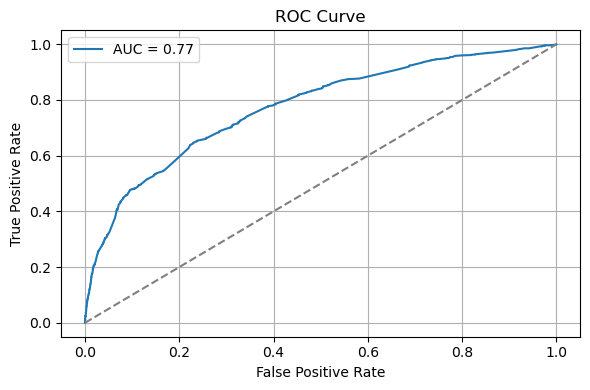

In [114]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load 
df_merged = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/model_data.csv")

# Split features X and label y
X = df_merged.drop(columns=['hadm_id', 'hospital_expire_flag'])
y = df_merged['hospital_expire_flag']

# Split into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit logistic regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict probabilities on test set 
y_prob = clf.predict_proba(X_test)[:, 1]

# Evaluate AUC score
auc = roc_auc_score(y_test, y_prob)
print(f"step4: AUC = {auc:.4f}")

# Plot ROC curve 
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/Users/yue/Desktop/MIMIC_IV/roc_curve.png")
print("step4: ROC curve saved. success.")

# Analyze regression coefficients  
coef_df = pd.DataFrame({
    'path': X.columns,
    'coef': clf.coef_[0]
}).sort_values(by='coef', ascending=False)

# Print top 15 paths  
print(coef_df.head(15))

# Save 
coef_df.to_csv("/Users/yue/Desktop/MIMIC_IV/path_logistic_coefficients.csv", index=False)
print("step4: saved path_logistic_coefficients.csv. success.")

### 8.2.2 Without XYZ

AUC = 0.7896
step6 ROC curve saved successfully
All coefficients saved
Top-15 with names saved to /Users/yue/Desktop/MIMIC_IV/top15_paths_with_names.csv
                 path                                                                                                                                                                                                                                                                                                                                                        path_names     coef
('A41', 'J96', 'R57')                                                                                                                                                                                                                                                                    Other sepsis → Respiratory failure, not elsewhere classified → Shock, not elsewhere classified 2.652058
('U07', 'J12', 'R65')                                                        

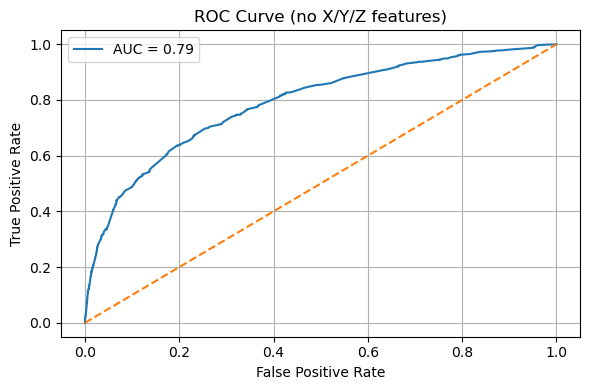

In [102]:
import re
import ast
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
BASE = "/Users/yue/Desktop/MIMIC_IV/"
MODEL_FILE = BASE + "model_data.csv"
NAME_MAP    = BASE + "diagnoses_icd_named.csv.gz"   
ROC_PNG     = BASE + "roc_curve.png"
ALL_COEF    = BASE + "path_logistic_coefficients.csv"
TOP15_CSV   = BASE + "top15_paths_with_names.csv"

# Load 
map_df = pd.read_csv(NAME_MAP, usecols=["icd_code_3char", "long_title"]).dropna()
map_df = map_df.drop_duplicates("icd_code_3char")
ICD2NAME = dict(zip(map_df["icd_code_3char"].astype(str).str.upper(), map_df["long_title"]))


def split_codes(path_str: str):
    """Return a list of 3-char codes from a feature name."""
    if pd.isna(path_str):
        return []
    s = str(path_str).strip()
    
    try:
        if s.startswith("(") and s.endswith(")"):
            tup = ast.literal_eval(s)
            return [str(x).strip().upper() for x in tup]
    except Exception:
        pass
    # fallback
    s = s.strip("()[]")
    parts = re.split(r"\s*(?:→|->|>|,|\||;)\s*", s)
    return [p.strip().strip("'\"").upper() for p in parts if p.strip()]

def codes_to_names(path_str: str) -> str:
    codes = split_codes(path_str)
    names = [ICD2NAME.get(c, c) for c in codes]
    return " → ".join(names)

# Load 
df = pd.read_csv(MODEL_FILE)

#  Build X and y 
X = df.drop(columns=["hadm_id", "hospital_expire_flag"])
y = df["hospital_expire_flag"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict + AUC
y_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC = {auc:.4f}")

# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (no X/Y/Z features)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(ROC_PNG)
print("step6 ROC curve saved successfully")

# Coefficients 
coef_df = pd.DataFrame({"path": X.columns, "coef": clf.coef_[0]}).sort_values(
    "coef", ascending=False
)
coef_df.to_csv(ALL_COEF, index=False)
print("All coefficients saved")

# Top-15 
top15 = coef_df.head(15).copy()
top15["path_names"] = top15["path"].apply(codes_to_names)
top15 = top15[["path", "path_names", "coef"]]
top15.to_csv(TOP15_CSV, index=False)
print(f"Top-15 with names saved to {TOP15_CSV}")
print(top15.to_string(index=False))

## 8.3 Include patient demographics in the model 

### 8.3.1 WITH XYZ

 Step3: model_data_with_demographics.csv saved.
 Step5: AUC = 0.7856
 Step5: ROC curve saved.
 Step6: Coefficients saved.

 Top 15 strongest predictors:
                         feature      coef
46         ('A41', 'J96', 'R57')  2.658296
39         ('U07', 'J12', 'R65')  1.992024
28         ('K72', 'D68', 'D69')  1.888986
45         ('N17', 'E87', 'E16')  1.677343
7          ('N17', 'E87', 'Z78')  1.417916
21         ('A41', 'J96', 'J18')  1.397298
30         ('U07', 'J12', 'J80')  1.301252
19         ('A41', 'J18', 'J96')  1.127053
49         ('C34', 'C78', 'C79')  1.099448
32         ('T81', 'I97', 'Y83')  1.019172
36         ('A41', 'J69', 'J96')  0.972356
40         ('N17', 'E87', 'E88')  0.894840
12  ('I13', 'I50', 'I25', 'Z95')  0.716696
41         ('I63', 'G81', 'R29')  0.665208
1          ('N17', 'E87', 'E83')  0.645542


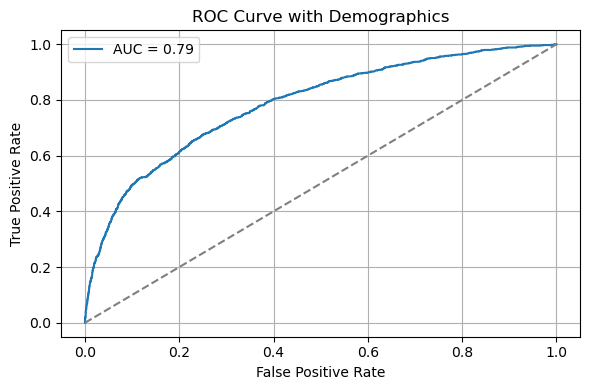

In [116]:
# Load 
import pandas as pd

df_binary = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/path_features_binary_matrix.csv")
df_binary['hadm_id'] = df_binary['hadm_id'].astype(int)

# Load
df_adm = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/admissions.csv.gz", compression='gzip')
df_adm = df_adm[['hadm_id', 'subject_id', 'hospital_expire_flag']].dropna()
df_adm['hadm_id'] = df_adm['hadm_id'].astype(int)
df_adm['subject_id'] = df_adm['subject_id'].astype(int)

# Load
df_pat = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/patients.csv.gz", compression='gzip')
df_pat = df_pat[['subject_id', 'anchor_age', 'gender']].dropna()
df_pat['subject_id'] = df_pat['subject_id'].astype(int)
df_pat['anchor_age'] = df_pat['anchor_age'].astype(int)

# Merge to get demographics
df_demo = pd.merge(df_adm, df_pat, on='subject_id', how='inner')

# Convert gender: M = 1, F = 0
df_demo['gender'] = df_demo['gender'].map({'M': 1, 'F': 0})

# Rename for consistency
df_demo.rename(columns={'anchor_age': 'age'}, inplace=True)

# Keep necessary columns
df_demo = df_demo[['hadm_id', 'hospital_expire_flag', 'gender', 'age']]


# Merge with path matrix
df_merged = pd.merge(df_binary, df_demo, on='hadm_id', how='inner')
df_merged.to_csv("/Users/yue/Desktop/MIMIC_IV/model_data_with_demographics.csv", index=False)
print(" Step3: model_data_with_demographics.csv saved.")

# Train logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load
df_merged = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/model_data_with_demographics.csv")

# Feature matrix target
X = df_merged.drop(columns=['hadm_id', 'hospital_expire_flag'])
y = df_merged['hospital_expire_flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Fit model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict on test set
y_prob = clf.predict_proba(X_test)[:, 1]


# AUC AND ROC curve
auc = roc_auc_score(y_test, y_prob)
print(f" Step5: AUC = {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Demographics")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("/Users/yue/Desktop/MIMIC_IV/roc_curve_with_demographics.png")
print(" Step5: ROC curve saved.")


# Export coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coef': clf.coef_[0]
}).sort_values(by='coef', ascending=False)

coef_df.to_csv("/Users/yue/Desktop/MIMIC_IV/path_logistic_coefficients_with_demographics.csv", index=False)
print(" Step6: Coefficients saved.")

# Preview top 15 
print("\n Top 15 strongest predictors:")
print(coef_df.head(15))

### 8.3.2 Without xyz

AUC = 0.7591
ROC saved to /Users/yue/Desktop/MIMIC_IV/roc_curve_with_demographics_noXYZ.png
All coefficients saved to /Users/yue/Desktop/MIMIC_IV/path_logistic_coefficients_with_demographics_noXYZ.csv
Top 15 paths saved to /Users/yue/Desktop/MIMIC_IV/top15_paths_with_names_demographics_noXYZ.csv
                 path                                                                                                                                                                                        path_names     coef
('A41', 'J96', 'R57')                                                                                                    Other sepsis → Respiratory failure, not elsewhere classified → Shock, not elsewhere classified 2.699936
('U07', 'J12', 'R65')                                            Emergency use of U07 → Viral pneumonia, not elsewhere classified → Symptoms and signs specifically associated with systemic inflammation and infection 1.967950
('K72', 'D68', 'D69')       

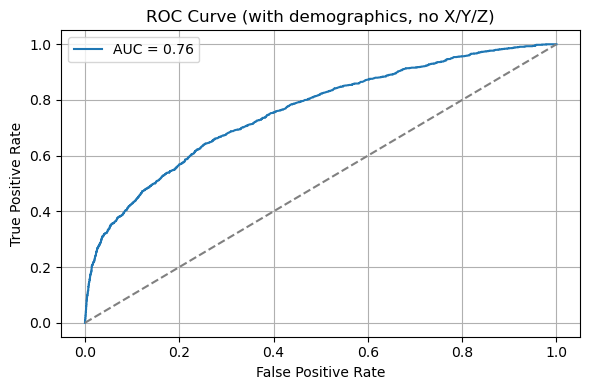

In [104]:
import pandas as pd
import re
import ast
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths
BASE = "/Users/yue/Desktop/MIMIC_IV/"
MODEL_FILE = BASE + "model_data_with_demographics.csv"
NAME_MAP   = BASE + "diagnoses_icd_named.csv.gz"
ROC_PNG    = BASE + "roc_curve_with_demographics_noXYZ.png"
ALL_COEF   = BASE + "path_logistic_coefficients_with_demographics_noXYZ.csv"
TOP15_CSV  = BASE + "top15_paths_with_names_demographics_noXYZ.csv"

# Load 
map_df = pd.read_csv(NAME_MAP, usecols=["icd_code_3char", "long_title"]).dropna()
map_df = map_df.drop_duplicates("icd_code_3char")
ICD2NAME = dict(zip(map_df["icd_code_3char"].astype(str).str.upper(), map_df["long_title"]))


def split_codes(path_str: str):
    """Extract ICD codes from feature string."""
    if pd.isna(path_str):
        return []
    s = str(path_str).strip()
    # tuple format e.g. ('A41','J96','R57')
    try:
        if s.startswith("(") and s.endswith(")"):
            tup = ast.literal_eval(s)
            return [str(x).strip().upper() for x in tup]
    except Exception:
        pass
    
    s = s.strip("()[]")
    parts = re.split(r"\s*(?:→|->|>|,|\||;)\s*", s)
    return [p.strip().strip("'\"").upper() for p in parts if p.strip()]

def has_xyz(path_str: str) -> bool:
    """Check if any ICD code starts with X/Y/Z."""
    return any(c and c[0] in ("X", "Y", "Z") for c in split_codes(path_str))

def codes_to_names(path_str: str) -> str:
    """Map ICD codes to disease names."""
    codes = split_codes(path_str)
    names = [ICD2NAME.get(c, c) for c in codes]
    return " → ".join(names)

# Load 
df = pd.read_csv(MODEL_FILE)

# Features target
all_features = [c for c in df.columns if c not in ("hadm_id", "hospital_expire_flag")]
# Keep demographic vars regardless of XYZ
demo_vars = ["age", "gender"]
path_features = [f for f in all_features if f not in demo_vars and not has_xyz(f)]
feature_cols = demo_vars + path_features

X = df[feature_cols]
y = df["hospital_expire_flag"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Fit logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# AUC and ROC
y_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC = {auc:.4f}")

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (with demographics, no X/Y/Z)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(ROC_PNG)
print(f"ROC saved to {ROC_PNG}")

# Export all coefficients
coef_df = pd.DataFrame({"feature": X.columns, "coef": clf.coef_[0]}).sort_values(
    "coef", ascending=False
)
coef_df.to_csv(ALL_COEF, index=False)
print(f"All coefficients saved to {ALL_COEF}")

# Top 15 path 
top15 = coef_df[~coef_df["feature"].isin(demo_vars)].head(15).copy()
top15["path_names"] = top15["feature"].apply(codes_to_names)
top15.rename(columns={"feature": "path"}, inplace=True)
top15 = top15[["path", "path_names", "coef"]]
top15.to_csv(TOP15_CSV, index=False)
print(f"Top 15 paths saved to {TOP15_CSV}")
print(top15.to_string(index=False))

## 8.4 Mortality Risk Prediction Using XGBoost

In [1333]:
!pip install xgboost

### 8.4.1 With xyz

AUC = 0.7935
Feature importance saved to: /Users/yue/Desktop/MIMIC_IV/xgboost_feature_importance.csv

Top 15 strongest predictors:
                  feature  importance
0   ('A41', 'J96', 'R57')    0.259991
1   ('U07', 'J12', 'R65')    0.091932
2   ('N17', 'E87', 'Z78')    0.055724
3   ('N17', 'E87', 'E16')    0.054892
4   ('A41', 'J96', 'J18')    0.052961
5   ('K72', 'D68', 'D69')    0.049215
6   ('U07', 'J12', 'J80')    0.035337
7   ('I12', 'N18', 'Z99')    0.030579
8   ('N17', 'E87', 'E83')    0.021312
9   ('A41', 'J69', 'J96')    0.021122
10  ('A41', 'J18', 'J96')    0.020333
11  ('C34', 'C78', 'C79')    0.019162
12  ('N17', 'E87', 'E88')    0.018376
13  ('I21', 'I50', 'I25')    0.017156
14  ('A41', 'J96', 'G92')    0.016245
ROC curve saved to: /Users/yue/Desktop/MIMIC_IV/xgboost_roc_curve.png


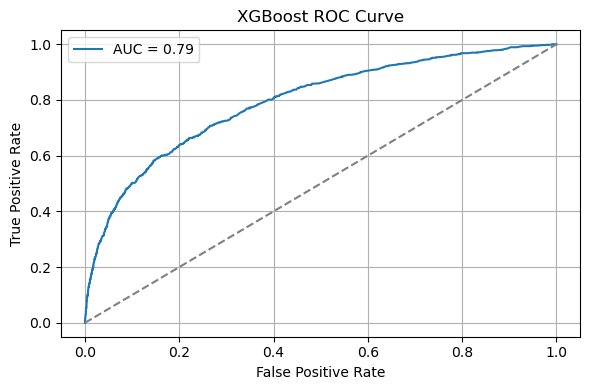

In [118]:
# Load 
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  

df_merged = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/model_data_with_demographics.csv")

X = df_merged.drop(columns=['hadm_id', 'hospital_expire_flag'])
y = df_merged['hospital_expire_flag']

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

clf = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)

clf.fit(X_train, y_train)

# Predict probabilities
y_prob = clf.predict_proba(X_test)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_prob)
print(f"AUC = {auc:.4f}")

# Extract and display top features 
import numpy as np

# Create importance DataFrame
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': clf.feature_importances_
})

# Sort and reset index
importance_df = importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

# Save
importance_path = "/Users/yue/Desktop/MIMIC_IV/xgboost_feature_importance.csv"
importance_df.to_csv(importance_path, index_label='rank')
print(f"Feature importance saved to: {importance_path}")

# Print top 15
print("\nTop 15 strongest predictors:")
print(importance_df.head(15))

# Plot and save ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()

save_path = "/Users/yue/Desktop/MIMIC_IV/xgboost_roc_curve.png"
plt.savefig(save_path)
print(f"ROC curve saved to: {save_path}")

### 8.4.2 Without xyz

AUC = 0.8015
Top-15 with names saved to /Users/yue/Desktop/MIMIC_IV/xgboost_top15_paths_with_names.csv
                 path  importance                                                                                                                                                               path_names
('A41', 'J96', 'R57')    0.253999                                                                           Other sepsis → Respiratory failure, not elsewhere classified → Shock, not elsewhere classified
('N17', 'E87', 'Z78')    0.069520                                                       Acute kidney failure → Other disorders of fluid, electrolyte and acid-base balance → Other specified health status
('U07', 'J12', 'R65')    0.068846                   Emergency use of U07 → Viral pneumonia, not elsewhere classified → Symptoms and signs specifically associated with systemic inflammation and infection
('K72', 'D68', 'D69')    0.050720                                                    

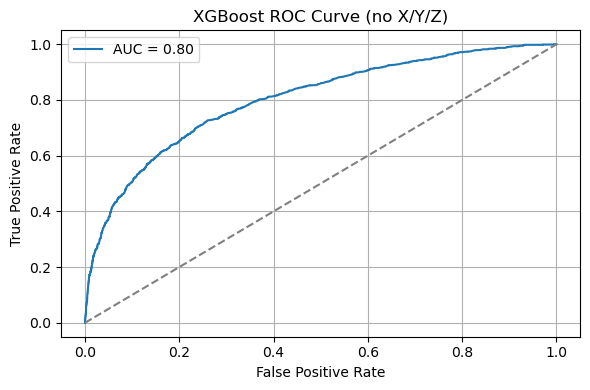

In [106]:
import re
import ast
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)  
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Paths 
BASE = "/Users/yue/Desktop/MIMIC_IV/"
MODEL_FILE = BASE + "model_data_with_demographics.csv"   
NAME_MAP    = BASE + "diagnoses_icd_named.csv.gz"        
TOP15_CSV   = BASE + "xgboost_top15_paths_with_names.csv"
ROC_PNG     = BASE + "xgboost_roc_curve_noXYZ.png"

# Load  
map_df = pd.read_csv(NAME_MAP, usecols=["icd_code_3char", "long_title"]).dropna()
map_df = map_df.drop_duplicates("icd_code_3char")
ICD2NAME = dict(zip(map_df["icd_code_3char"].astype(str).str.upper(), map_df["long_title"]))

def split_codes(path_str: str):
    """Extract 3-char ICD codes from path string."""
    if pd.isna(path_str):
        return []
    s = str(path_str).strip()
    try:
        if s.startswith("(") and s.endswith(")"):
            tup = ast.literal_eval(s)
            return [str(x).strip().upper() for x in tup]
    except Exception:
        pass
    s = s.strip("()[]")
    parts = re.split(r"\s*(?:→|->|>|,|\||;)\s*", s)
    return [p.strip().strip("'\"").upper() for p in parts if p.strip()]

def codes_to_names(path_str: str) -> str:
    """Convert ICD codes to long names."""
    codes = split_codes(path_str)
    names = [ICD2NAME.get(c, c) for c in codes]
    return " → ".join(names)

# Load  
df_merged = pd.read_csv(MODEL_FILE)

# Drop features containing 'X', 'Y', 'Z'
cols_to_use = [col for col in df_merged.columns 
               if col not in ['hadm_id', 'hospital_expire_flag'] 
               and not re.search(r"\b[XYZ]\b", col)]
X = df_merged[cols_to_use]
y = df_merged['hospital_expire_flag']

# Train/test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train XGBoost model
clf = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss'
)
clf.fit(X_train, y_train)

#  Predict  AUC 
y_prob = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"AUC = {auc:.4f}")

# Feature importance
importance_df = pd.DataFrame({
    'path': X_train.columns,
    'importance': clf.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

# Top 15 with names
top15 = importance_df.head(15).copy()
top15['path_names'] = top15['path'].apply(codes_to_names)
top15.to_csv(TOP15_CSV, index=False)
print(f"Top-15 with names saved to {TOP15_CSV}")
print(top15.to_string(index=False))

# Plot ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve (no X/Y/Z)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(ROC_PNG)
print(f"ROC curve saved to: {ROC_PNG}")

## 8.5 Grid Search for Best XGBoost Parameters

### 8.5.1 With xyz

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.07444444444444444, 'gamma': 0.1, 'colsample_bytree': 0.6}

Tuned XGBoost AUC = 0.8050
ROC curve saved to: /Users/yue/Desktop/MIMIC_IV/xgboost_tuned_roc_curve.png

Top 15 most important path features:
                  feature  importance
46  ('A41', 'J96', 'R57')    0.156482
7   ('N17', 'E87', 'Z78')    0.075530
28  ('K72', 'D68', 'D69')    0.053943
39  ('U07', 'J12', 'R65')    0.053145
45  ('N17', 'E87', 'E16')    0.051207
21  ('A41', 'J96', 'J18')    0.042320
20  ('I11', 'I50', 'I25')    0.037875
30  ('U07', 'J12', 'J80')    0.035247
1   ('N17', 'E87', 'E83')    0.032155
19  ('A41', 'J18', 'J96')    0.028896
2   ('I12', 'N18', 'D63')    0.025358
3   ('I12', 'N18', 'M10')    0.024289
36  ('A41', 'J69', 'J96')    0.022782
37  ('I21', 'I50', 'I25')    0.022213
49  ('C34', 'C78', 'C79')    0.020180
Feature i

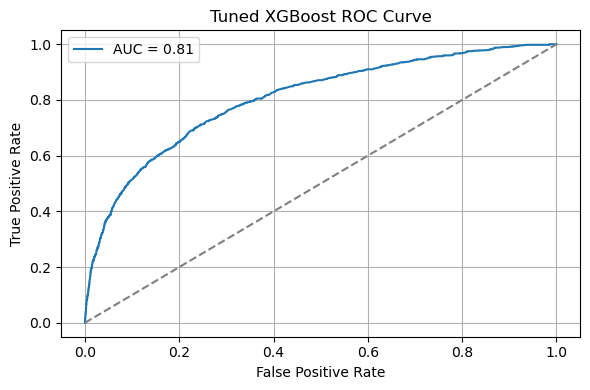

In [120]:
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger("xgboost").setLevel(logging.CRITICAL)

# Load 
import pandas as pd
df_merged = pd.read_csv("/Users/yue/Desktop/MIMIC_IV/model_data_with_demographics.csv")
X = df_merged.drop(columns=['hadm_id', 'hospital_expire_flag'])
y = df_merged['hospital_expire_flag']

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# RandomizedSearchCV with enhanced param space
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("Best parameters found:", random_search.best_params_)

# Evaluate
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"\nTuned XGBoost AUC = {auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned XGBoost ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
roc_path = "/Users/yue/Desktop/MIMIC_IV/xgboost_tuned_roc_curve.png"
plt.savefig(roc_path)
print(f"ROC curve saved to: {roc_path}")

# Output Top 15 Feature 
feature_importance = best_model.feature_importances_
feature_names = X.columns
df_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})
df_importance_sorted = df_importance.sort_values(by='importance', ascending=False)
print("\nTop 15 most important path features:")
print(df_importance_sorted.head(15))
importance_path = "/Users/yue/Desktop/MIMIC_IV/xgboost_feature_importance.csv"
df_importance_sorted.to_csv(importance_path, index=False)
print(f"Feature importance saved to: {importance_path}")

### 8.5.2 Without xyz

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best parameters found {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.07444444444444444, 'gamma': 0.1, 'colsample_bytree': 0.6}
tuned XGBoost AUC = 0.8050
ROC curve saved to /Users/yue/Desktop/MIMIC_IV/xgboost_tuned_roc_noXYZ.png
top 15 paths with names saved to /Users/yue/Desktop/MIMIC_IV/xgboost_tuned_top15_paths_with_names.csv
                 path                                                                                                                                                               path_names  importance
('A41', 'J96', 'R57')                                                                           Other sepsis → Respiratory failure, not elsewhere classified → Shock, not elsewhere classified    0.156482
('N17', 'E87', 'Z78')                                                       Acute kidney failure → Other disorders of fluid, electrolyte and acid-base

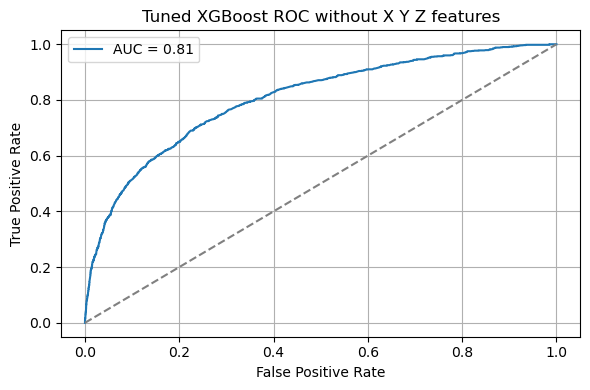

In [112]:
import warnings
import logging
warnings.filterwarnings("ignore")
logging.getLogger("xgboost").setLevel(logging.CRITICAL)

#  load
import pandas as pd
import numpy as np
import re
import ast
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

BASE = "/Users/yue/Desktop/MIMIC_IV/"
MODEL_FILE = BASE + "model_data_with_demographics.csv"
NAME_MAP = BASE + "diagnoses_icd_named.csv.gz"
ROC_PNG = BASE + "xgboost_tuned_roc_noXYZ.png"
TOP15_CSV = BASE + "xgboost_tuned_top15_paths_with_names.csv"

# load 
map_df = pd.read_csv(NAME_MAP, usecols=["icd_code_3char", "long_title"]).dropna()
map_df = map_df.drop_duplicates("icd_code_3char")
ICD2NAME = dict(zip(map_df["icd_code_3char"].astype(str).str.upper(), map_df["long_title"]))

def split_codes(path_str):
    if pd.isna(path_str):
        return []
    s = str(path_str).strip()
    try:
        if s.startswith("(") and s.endswith(")"):
            tup = ast.literal_eval(s)
            return [str(x).strip().upper() for x in tup]
    except Exception:
        pass
    s = s.strip("()[]")
    parts = re.split(r"\s*(?:→|->|>|,|\||;)\s*", s)
    return [p.strip().strip("'\"").upper() for p in parts if p.strip()]

def codes_to_names(path_str):
    codes = split_codes(path_str)
    names = [ICD2NAME.get(c, c) for c in codes]
    return " → ".join(names)

# load 
df = pd.read_csv(MODEL_FILE)
df = df[[col for col in df.columns if not re.match(r'^[XYZ]', str(col)) or col in ['hadm_id', 'hospital_expire_flag']]]

X = df.drop(columns=['hadm_id', 'hospital_expire_flag'])
y = df['hospital_expire_flag']

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# randomized search for best hyperparameters
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [100, 200, 300, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print("best parameters found", random_search.best_params_)

# evaluate AUC
y_prob = best_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
print(f"tuned XGBoost AUC = {auc:.4f}")

# plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Tuned XGBoost ROC without X Y Z features")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig(ROC_PNG)
print(f"ROC curve saved to {ROC_PNG}")

# feature importance and top 15 
importance_df = pd.DataFrame({
    'path': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

top15 = importance_df.head(15).copy()
top15['path_names'] = top15['path'].apply(codes_to_names)
top15 = top15[['path', 'path_names', 'importance']]
top15.to_csv(TOP15_CSV, index=False)
print(f"top 15 paths with names saved to {TOP15_CSV}")
print(top15.to_string(index=False))